In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import pickle

from datetime import timedelta
from datetime import datetime
from datetime import date
from datetime import time

from tqdm import tqdm
import scipy.stats as st

In [2]:
df_transf0 = pd.read_csv("DATA_RESULTS/df_GRADY_RBCT_extractedFeat_NoImputated_tau9_v3.csv")
df_transf0.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis=1, inplace=True)

In [3]:
df_transf0.drop_duplicates(inplace=True)
df_transf0.shape

(6375, 46)

# Eliminated the patients having pre-transfusion SF, Hb, SpO2, PF missing

In [4]:
print(df_transf0[['med_spo2_beforeT', 'med_Hb_beforeT', 'med_SF_beforeT','med_PF_beforeT']].isnull().all(axis=1).sum())

df_transf = df_transf0[~df_transf0[['med_spo2_beforeT', 'med_Hb_beforeT', 'med_SF_beforeT','med_PF_beforeT']].isnull().all(axis=1)]
df_transf.reset_index(drop=True, inplace=True)
print(df_transf.shape)

print(len(df_transf0.pat_id.unique()), len(df_transf0.csn.unique()), len(df_transf.pat_id.unique()), len(df_transf.csn.unique()))

0
(6375, 46)
3552 3757 3552 3757


In [ ]:
df_transf

In [6]:
df_transf[df_transf.med_spo2_beforeT.isnull()].shape

(0, 46)

In [7]:
df_transf.med_SF_beforeT.isnull().sum()

0

In [8]:
(pd.to_datetime(df_transf.transfusion_end) - pd.to_datetime(df_transf.transfusion_start)).mean()

Timedelta('0 days 05:56:32.771165129')

In [9]:
(pd.to_datetime(df_transf.transfusion_end) - pd.to_datetime(df_transf.transfusion_start)).median()

Timedelta('0 days 02:08:00')

In [10]:
df_transf.loc[:,'Hb':].max()

Hb                    16.650000
med_spo2_beforeT     100.000000
med_Hb_beforeT        18.000000
med_SF_beforeT       476.190476
med_PF_beforeT      2642.857143
MSPO2_afterT1        100.000000
MSPO2_afterT2        100.000000
MSPO2_afterT3        100.000000
MHB_afterT1           19.100000
MHB_afterT2           19.600000
MHB_afterT3           20.300000
MSF_afterT1          476.190476
MSF_afterT2          476.190476
MSF_afterT3          476.190476
MPF_afterT1         2642.857143
MPF_afterT2         2642.857143
MPF_afterT3         2642.857143
del_SPO2_1            38.000000
del_SPO2_2            37.000000
del_SPO2_3            37.000000
del_Hb_1              11.600000
del_Hb_2              13.200000
del_Hb_3              14.300000
del_SF_1             328.571429
del_SF_2             371.666667
del_SF_3             378.190476
del_PF_1            2244.452381
del_PF_2            1644.452381
del_PF_3            1644.452381
dtype: float64

In [11]:
df_transf['MSF_beforeT']=df_transf['med_SF_beforeT']
# df_transf.pop('med_SF_beforeT')
df_transf['MSF_beforeT']

0       357.142857
1       245.625000
2       219.444444
3       250.000000
4       245.000000
           ...    
6370    447.619048
6371    466.122449
6372    469.642857
6373    442.857143
6374    166.666667
Name: MSF_beforeT, Length: 6375, dtype: float64

## Delta SF vs baseline Hb for 4 pre-SF ranges and 3 time-horizons

In [12]:
cond1 =  df_transf['MSF_beforeT']>1
cond2 = df_transf['MSF_beforeT']<=143
cond12 = cond1 & cond2
# MSFbaseline_gp1 = df_transf['MSF_beforeT'][cond12]
MSFbaseline_gp1 =  pd.Series(np.where(cond12, df_transf['MSF_beforeT'], None))

In [13]:
del cond1, cond2, cond12
cond1 =  df_transf['MSF_beforeT']>144 
cond2 = df_transf['MSF_beforeT']<=235
cond12 = cond1 & cond2
# MSFbaseline_gp2 = df_transf['MSF_beforeT'][cond12]
MSFbaseline_gp2 =  pd.Series(np.where(cond12, df_transf['MSF_beforeT'], None))

In [14]:
del cond1, cond2, cond12
cond1 =  df_transf['MSF_beforeT']>236 
cond2 = df_transf['MSF_beforeT']<=315
cond12 = cond1 & cond2
# MSFbaseline_gp3 = df_transf['MSF_beforeT'][cond12]
MSFbaseline_gp3 =  pd.Series(np.where(cond12, df_transf['MSF_beforeT'], None))

In [15]:
del cond1, cond2, cond12
cond12 =  df_transf['MSF_beforeT']>315 
# MSFbaseline_gp4 = df_transf['MSF_beforeT'][cond12]
MSFbaseline_gp4 =  pd.Series(np.where(cond12, df_transf['MSF_beforeT'], None))

In [16]:
# df_transf['MSF_afterT1']#
zx = df_transf['MSF_afterT1'] - MSFbaseline_gp1
zx.isnull().sum()

5686

In [17]:
len(df_transf['MSF_afterT1'])

6375

In [18]:
len(MSFbaseline_gp1)

6375

In [19]:
zx

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
6370    NaN
6371    NaN
6372    NaN
6373    NaN
6374    NaN
Length: 6375, dtype: object

In [20]:
df_transf['del_SF_1a']=df_transf['MSF_afterT1'] - MSFbaseline_gp1
df_transf['del_SF_2a']=df_transf['MSF_afterT2'] - MSFbaseline_gp1
df_transf['del_SF_3a']=df_transf['MSF_afterT3'] - MSFbaseline_gp1

In [21]:
df_transf['del_SF_1b']=df_transf['MSF_afterT1'] - MSFbaseline_gp2
df_transf['del_SF_2b']=df_transf['MSF_afterT2'] - MSFbaseline_gp2
df_transf['del_SF_3b']=df_transf['MSF_afterT3'] - MSFbaseline_gp2

In [22]:
df_transf['del_SF_1c']=df_transf['MSF_afterT1'] - MSFbaseline_gp3
df_transf['del_SF_2c']=df_transf['MSF_afterT2'] - MSFbaseline_gp3
df_transf['del_SF_3c']=df_transf['MSF_afterT3'] - MSFbaseline_gp3

In [23]:
df_transf['del_SF_1d']=df_transf['MSF_afterT1'] - MSFbaseline_gp4
df_transf['del_SF_2d']=df_transf['MSF_afterT2'] - MSFbaseline_gp4
df_transf['del_SF_3d']=df_transf['MSF_afterT3'] - MSFbaseline_gp4

(-400.0, 400.0)

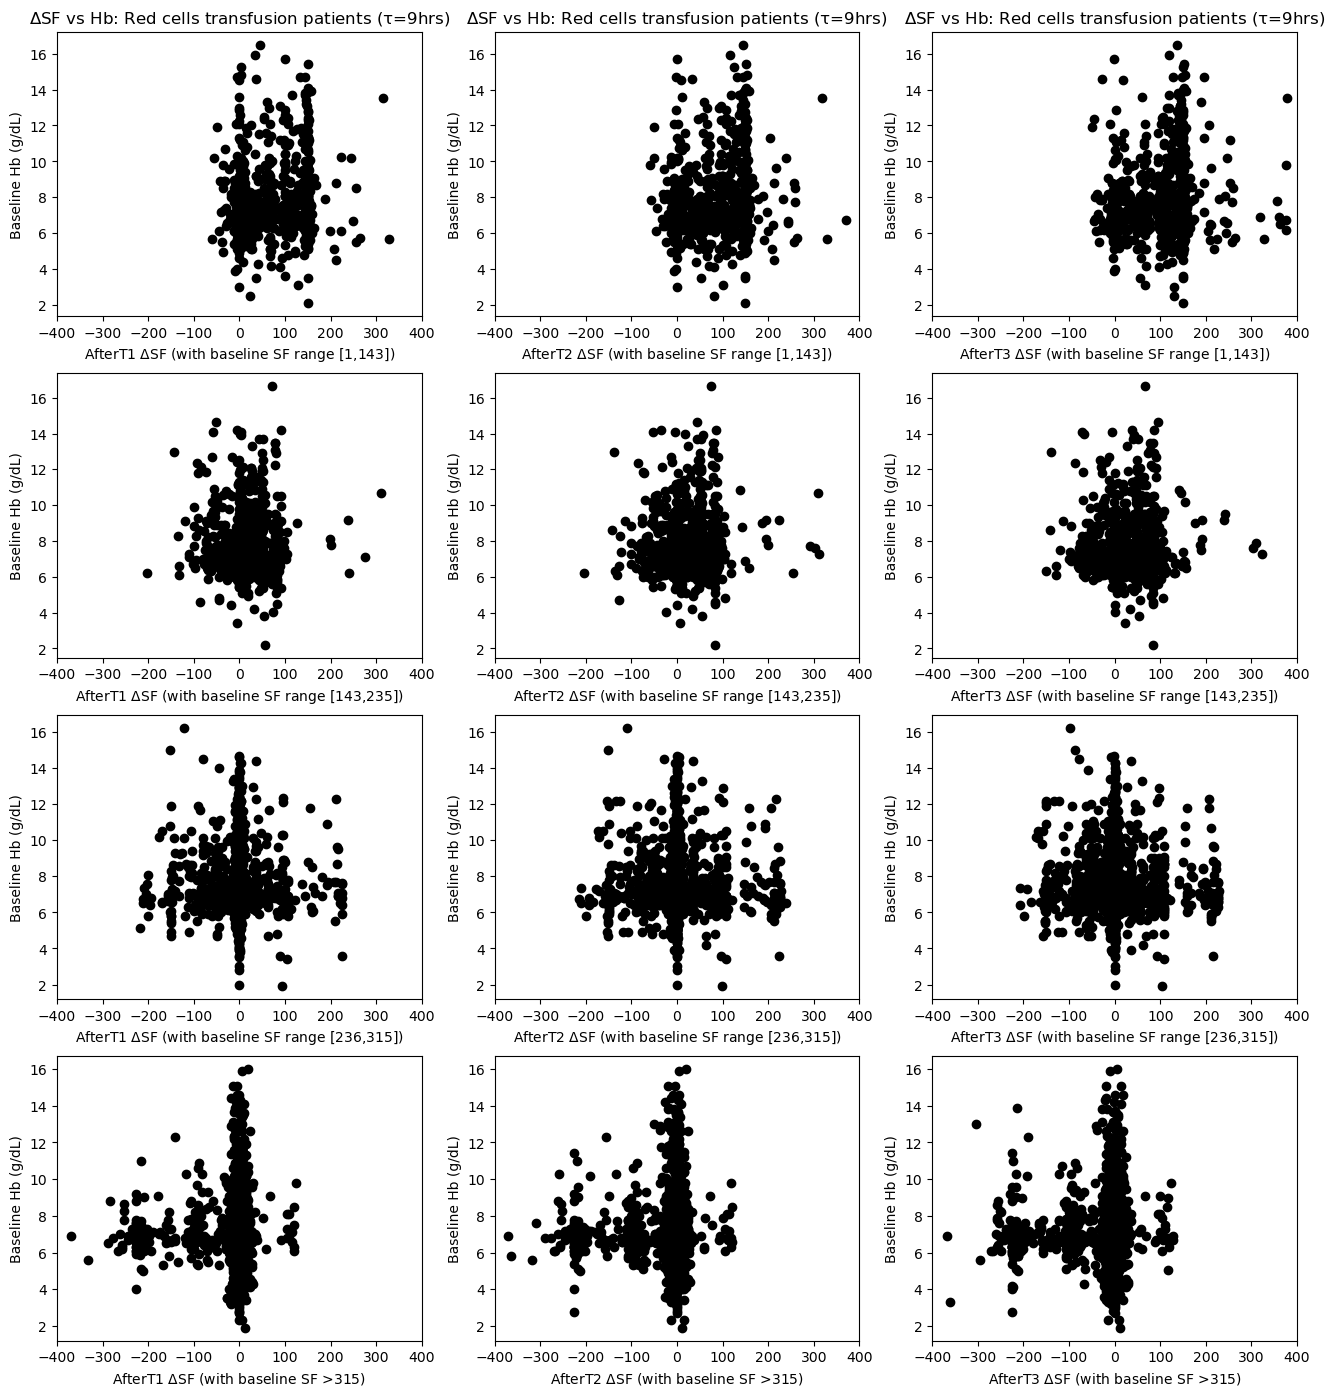

In [24]:
fig, axs = plt.subplots(4, 3, figsize =(16, 17))

axs[0,0].scatter(df_transf['del_SF_1a'], df_transf['Hb'],color='black')
axs[0,0].set_title('$\Delta$SF vs Hb: Red cells transfusion patients (\u03C4=9hrs)')
axs[0,0].set_xlabel('AfterT1 $\Delta$SF (with baseline SF range [1,143])')
axs[0,0].set_ylabel('Baseline Hb (g/dL)')
axs[0,0].set_xlim([-400, 400])

axs[0,1].scatter(df_transf['del_SF_2a'], df_transf['Hb'],color='black')
axs[0,1].set_title('$\Delta$SF vs Hb: Red cells transfusion patients (\u03C4=9hrs)')
axs[0,1].set_xlabel('AfterT2 $\Delta$SF (with baseline SF range [1,143])')
axs[0,1].set_ylabel('Baseline Hb (g/dL)')
axs[0,1].set_xlim([-400, 400])

axs[0,2].scatter(df_transf['del_SF_3a'], df_transf['Hb'],color='black')
axs[0,2].set_title('$\Delta$SF vs Hb: Red cells transfusion patients (\u03C4=9hrs)')
axs[0,2].set_xlabel('AfterT3 $\Delta$SF (with baseline SF range [1,143])')
axs[0,2].set_ylabel('Baseline Hb (g/dL)')
axs[0,2].set_xlim([-400, 400])

axs[1,0].scatter(df_transf['del_SF_1b'], df_transf['Hb'],color='black')
#axs[1,0].set_title('$\Delta$SF vs Hb: Red cells transfusion patients (\u03C4=9hrs)')
axs[1,0].set_xlabel('AfterT1 $\Delta$SF (with baseline SF range [143,235])')
axs[1,0].set_ylabel('Baseline Hb (g/dL)')
axs[1,0].set_xlim([-400, 400])

axs[1,1].scatter(df_transf['del_SF_2b'], df_transf['Hb'],color='black')
#axs[1,1].set_title('$\Delta$SF vs Hb: Red cells transfusion patients (\u03C4=9hrs)')
axs[1,1].set_xlabel('AfterT2 $\Delta$SF (with baseline SF range [143,235])')
axs[1,1].set_ylabel('Baseline Hb (g/dL)')
axs[1,1].set_xlim([-400, 400])

axs[1,2].scatter(df_transf['del_SF_3b'], df_transf['Hb'],color='black')
#axs[1,2].set_title('$\Delta$SF vs Hb: Red cells transfusion patients (\u03C4=9hrs)')
axs[1,2].set_xlabel('AfterT3 $\Delta$SF (with baseline SF range [143,235])')
axs[1,2].set_ylabel('Baseline Hb (g/dL)')
axs[1,2].set_xlim([-400, 400])

axs[2,0].scatter(df_transf['del_SF_1c'], df_transf['Hb'],color='black')
#axs[2,0].set_title('$\Delta$SF vs Hb: Red cells transfusion patients (\u03C4=9hrs)')
axs[2,0].set_xlabel('AfterT1 $\Delta$SF (with baseline SF range [236,315])')
axs[2,0].set_ylabel('Baseline Hb (g/dL)')
axs[2,0].set_xlim([-400, 400])

axs[2,1].scatter(df_transf['del_SF_2c'], df_transf['Hb'],color='black')
#axs[2,1].set_title('$\Delta$SF vs Hb: Red cells transfusion patients (\u03C4=9hrs)')
axs[2,1].set_xlabel('AfterT2 $\Delta$SF (with baseline SF range [236,315])')
axs[2,1].set_ylabel('Baseline Hb (g/dL)')
axs[2,1].set_xlim([-400, 400])

axs[2,2].scatter(df_transf['del_SF_3c'], df_transf['Hb'],color='black')
#axs[2,2].set_title('$\Delta$SF vs Hb: Red cells transfusion patients (\u03C4=9hrs)')
axs[2,2].set_xlabel('AfterT3 $\Delta$SF (with baseline SF range [236,315])')
axs[2,2].set_ylabel('Baseline Hb (g/dL)')
axs[2,2].set_xlim([-400, 400])

axs[3,0].scatter(df_transf['del_SF_1d'], df_transf['Hb'],color='black')
#axs[3,0].set_title('$\Delta$SF vs Hb: Red cells transfusion patients (\u03C4=9hrs)')
axs[3,0].set_xlabel('AfterT1 $\Delta$SF (with baseline SF >315)')
axs[3,0].set_ylabel('Baseline Hb (g/dL)')
axs[3,0].set_xlim([-400, 400])

axs[3,1].scatter(df_transf['del_SF_2d'], df_transf['Hb'],color='black')
#axs[3,1].set_title('$\Delta$SF vs Hb: Red cells transfusion patients (\u03C4=9hrs)')
axs[3,1].set_xlabel('AfterT2 $\Delta$SF (with baseline SF >315)')
axs[3,1].set_ylabel('Baseline Hb (g/dL)')
axs[3,1].set_xlim([-400, 400])

axs[3,2].scatter(df_transf['del_SF_3d'], df_transf['Hb'],color='black')
#axs[3,2].set_title('$\Delta$SF vs Hb: Red cells transfusion patients (\u03C4=9hrs)')
axs[3,2].set_xlabel('AfterT3 $\Delta$SF (with baseline SF >315)')
axs[3,2].set_ylabel('Baseline Hb (g/dL)')
axs[3,2].set_xlim([-400, 400])

# plt.savefig('DATA_RESULTS_REV1/delSFvsHb_RedCellsT_Grady.png',format="png", bbox_inches="tight", dpi=300)

**Analysis: (1) % improvement in SF (for baseline SF 1-100 and >300) with 95% CI, (b) Association b/w Hb vs delSF**

In [26]:
#for baseline SF 1-143
dSF1a = df_transf['del_SF_1a'][~df_transf['del_SF_1a'].isnull()]
dSF2a = df_transf['del_SF_2a'][~df_transf['del_SF_2a'].isnull()]
dSF3a = df_transf['del_SF_3a'][~df_transf['del_SF_3a'].isnull()]

#calculating the 95% confidence interval of the mean of array dSF1a
CI1a = st.t.interval(0.95, len(dSF1a)-1, loc=dSF1a.mean(), scale=st.sem(dSF1a, nan_policy='omit'))
CI2a = st.t.interval(0.95, len(dSF2a)-1, loc=dSF2a.mean(), scale=st.sem(dSF2a, nan_policy='omit'))
CI3a = st.t.interval(0.95, len(dSF3a)-1, loc=dSF3a.mean(), scale=st.sem(dSF3a, nan_policy='omit'))
print(f'For baseline SF (1-143), mean increase in SF for T1 with 95% CI: ',dSF1a.mean(),CI1a)
print(f'For baseline SF (1-143), mean increase in SF for T2 with 95% CI: ',dSF2a.mean(),CI2a)
print(f'For baseline SF (1-143), mean increase in SF for T3 with 95% CI: ',dSF3a.mean(),CI3a)

q1q3_1a = dSF1a.quantile(0.25), dSF1a.quantile(0.75)
q1q3_2a = dSF2a.quantile(0.25), dSF2a.quantile(0.75)
q1q3_3a = dSF3a.quantile(0.25), dSF3a.quantile(0.75)

m_s_1a = dSF1a.mean()-dSF1a.std(), dSF1a.mean()+dSF1a.std()
m_s_2a = dSF2a.mean()-dSF2a.std(), dSF2a.mean()+dSF2a.std()
m_s_3a = dSF3a.mean()-dSF3a.std(), dSF3a.mean()+dSF3a.std()

print(f"Mean increment in SF for T1: {dSF1a.mean():.2f} ({m_s_1a[0]:.2f}, {m_s_1a[1]:.2f})")
print(f"Mean increment in SF for T2: {dSF2a.mean():.2f} ({m_s_2a[0]:.2f}, {m_s_2a[1]:.2f})")
print(f"Mean increment in SF for T3: {dSF3a.mean():.2f} ({m_s_3a[0]:.2f}, {m_s_3a[1]:.2f})")

For baseline SF (1-143), mean increase in SF for T1 with 95% CI:  64.4069814190826 (59.438423685308265, 69.37553915285693)
For baseline SF (1-143), mean increase in SF for T2 with 95% CI:  84.2531696897784 (79.09853554154888, 89.40780383800792)
For baseline SF (1-143), mean increase in SF for T3 with 95% CI:  100.27507285735481 (94.92663833230716, 105.62350738240247)
Mean increment in SF for T1: 64.41 (-2.02, 130.83)
Mean increment in SF for T2: 84.25 (15.34, 153.17)
Mean increment in SF for T3: 100.28 (28.77, 171.78)


In [27]:
#for baseline SF 143-235
dSF1b = df_transf['del_SF_1b'][~df_transf['del_SF_1b'].isnull()]
dSF2b = df_transf['del_SF_2b'][~df_transf['del_SF_2b'].isnull()]
dSF3b = df_transf['del_SF_3b'][~df_transf['del_SF_3b'].isnull()]

#calculating the 95% confidence interval of the mean of array dSF1a
CI1b = st.t.interval(0.95, len(dSF1b)-1, loc=dSF1b.mean(), scale=st.sem(dSF1b, nan_policy='omit'))
CI2b = st.t.interval(0.95, len(dSF2b)-1, loc=dSF2b.mean(), scale=st.sem(dSF2b, nan_policy='omit'))
CI3b = st.t.interval(0.95, len(dSF3b)-1, loc=dSF2b.mean(), scale=st.sem(dSF3b, nan_policy='omit'))

q1q3_1b = dSF1b.quantile(0.25), dSF1b.quantile(0.75)
q1q3_2b = dSF2b.quantile(0.25), dSF2b.quantile(0.75)
q1q3_3b = dSF3b.quantile(0.25), dSF3b.quantile(0.75)

m_s_1b = dSF1b.mean()-dSF1b.std(), dSF1b.mean()+dSF1b.std()
m_s_2b = dSF2b.mean()-dSF2b.std(), dSF2b.mean()+dSF2b.std()
m_s_3b = dSF3b.mean()-dSF3b.std(), dSF3b.mean()+dSF3b.std()

print(f"Mean increment in SF for T1: {dSF1b.mean():.2f} ({m_s_1b[0]:.2f}, {m_s_1b[1]:.2f})")
print(f"Mean increment in SF for T2: {dSF2b.mean():.2f} ({m_s_2b[0]:.2f}, {m_s_2b[1]:.2f})")
print(f"Mean increment in SF for T3: {dSF3b.mean():.2f} ({m_s_3b[0]:.2f}, {m_s_3b[1]:.2f})")

Mean increment in SF for T1: 18.49 (-29.25, 66.23)
Mean increment in SF for T2: 24.83 (-28.75, 78.41)
Mean increment in SF for T3: 32.21 (-21.50, 85.92)


In [28]:
#for baseline SF 236-315
dSF1c = df_transf['del_SF_1c'][~df_transf['del_SF_1c'].isnull()]
dSF2c = df_transf['del_SF_2c'][~df_transf['del_SF_2c'].isnull()]
dSF3c = df_transf['del_SF_3c'][~df_transf['del_SF_3c'].isnull()]

#calculating the 95% confidence interval of the mean of array dSF1a
CI1c = st.t.interval(0.95, len(dSF1c)-1, loc=dSF1c.mean(), scale=st.sem(dSF1c, nan_policy='omit'))
CI2c = st.t.interval(0.95, len(dSF2c)-1, loc=dSF2c.mean(), scale=st.sem(dSF2c, nan_policy='omit'))
CI3c = st.t.interval(0.95, len(dSF3c)-1, loc=dSF2c.mean(), scale=st.sem(dSF3c, nan_policy='omit'))

q1q3_1c = dSF1c.quantile(0.25), dSF1c.quantile(0.75)
q1q3_2c = dSF2c.quantile(0.25), dSF2c.quantile(0.75)
q1q3_3c = dSF3c.quantile(0.25), dSF3c.quantile(0.75)

m_s_1c = dSF1c.mean()-dSF1c.std(), dSF1c.mean()+dSF1c.std()
m_s_2c = dSF2c.mean()-dSF2c.std(), dSF2c.mean()+dSF2c.std()
m_s_3c = dSF3c.mean()-dSF3c.std(), dSF3c.mean()+dSF3c.std()

print(f"Mean increment in SF for T1: {dSF1c.mean():.2f} ({m_s_1c[0]:.2f}, {m_s_1c[1]:.2f})")
print(f"Mean increment in SF for T2: {dSF2c.mean():.2f} ({m_s_2c[0]:.2f}, {m_s_2c[1]:.2f})")
print(f"Mean increment in SF for T3: {dSF3c.mean():.2f} ({m_s_3c[0]:.2f}, {m_s_3c[1]:.2f})")

Mean increment in SF for T1: -1.37 (-40.33, 37.59)
Mean increment in SF for T2: 0.06 (-46.65, 46.77)
Mean increment in SF for T3: 1.22 (-48.72, 51.15)


In [29]:
#for baseline SF >315
dSF1d = df_transf['del_SF_1d'][~df_transf['del_SF_1d'].isnull()]
dSF2d = df_transf['del_SF_2d'][~df_transf['del_SF_2d'].isnull()]
dSF3d = df_transf['del_SF_3d'][~df_transf['del_SF_3d'].isnull()]

#calculating the 95% confidence interval of the mean of array dSF1a
CI1d = st.t.interval(0.95, len(dSF1d)-1, loc=dSF1d.mean(), scale=st.sem(dSF1d, nan_policy='omit'))
CI2d = st.t.interval(0.95, len(dSF2d)-1, loc=dSF2d.mean(), scale=st.sem(dSF2d, nan_policy='omit'))
CI3d = st.t.interval(0.95, len(dSF3d)-1, loc=dSF2d.mean(), scale=st.sem(dSF3d, nan_policy='omit'))
print(f'For baseline SF>315, mean increase in SF for T1 with 95% CI: ',dSF1d.mean(),CI1d)
print(f'For baseline SF>315, mean increase in SF for T2 with 95% CI: ',dSF2d.mean(),CI2d)
print(f'For baseline SF>315, mean increase in SF for T3 with 95% CI: ',dSF3d.mean(),CI3d)

q1q3_1d = dSF1d.quantile(0.25), dSF1d.quantile(0.75)
q1q3_2d = dSF2d.quantile(0.25), dSF2d.quantile(0.75)
q1q3_3d = dSF3d.quantile(0.25), dSF3d.quantile(0.75)

m_s_1d = dSF1d.mean()-dSF1d.std(), dSF1d.mean()+dSF1d.std()
m_s_2d = dSF2d.mean()-dSF2d.std(), dSF2d.mean()+dSF2d.std()
m_s_3d = dSF3d.mean()-dSF3d.std(), dSF3d.mean()+dSF3d.std()

print(f"Mean increment in SF for T1: {dSF1d.mean():.2f} ({m_s_1d[0]:.2f}, {m_s_1d[1]:.2f})")
print(f"Mean increment in SF for T2: {dSF2d.mean():.2f} ({m_s_2d[0]:.2f}, {m_s_2d[1]:.2f})")
print(f"Mean increment in SF for T3: {dSF3d.mean():.2f} ({m_s_3d[0]:.2f}, {m_s_3d[1]:.2f})")

For baseline SF>315, mean increase in SF for T1 with 95% CI:  -11.905944584016964 (-13.931851758499551, -9.880037409534378)
For baseline SF>315, mean increase in SF for T2 with 95% CI:  -17.597701850554213 (-20.017779297483447, -15.177624403624979)
For baseline SF>315, mean increase in SF for T3 with 95% CI:  -22.879916833777877 (-20.32023193122143, -14.875171769886997)
Mean increment in SF for T1: -11.91 (-59.04, 35.23)
Mean increment in SF for T2: -17.60 (-73.91, 38.71)
Mean increment in SF for T3: -22.88 (-86.22, 40.47)


In [30]:
df_transf['del_SF_1d'].max()

123.80952380952385

In [31]:
a1 = np.array([1,2,3,np.nan, np.nan,5])
a2 = np.array([9,np.nan,8,np.nan, np.nan,np.nan])

In [32]:
cond = ~np.isnan(a1+a2)
a1 = a1[cond]
a2 = a2[cond]
a1, a2

(array([1., 3.]), array([9., 8.]))

In [33]:
a1

array([1., 3.])

In [34]:
from sklearn.metrics import r2_score

In [35]:
def r2Score(y, f): #y:actual, f:predicted
    # SSres = sum(map(lambda x: (x[0]-x[1])**2, zip(y, f)))
    # SStot = sum([(x-np.mean(y))**2 for x in y])
    # r2 = 1-(SSres/SStot)
    
    cond = ~np.isnan(np.array(y+f, dtype='float'))
    y = y[cond]
    f = f[cond]
    
    
    ssres = sum((y - f)**2)
    sstot = sum((y-np.mean(y))**2)
    r2 = 1-(ssres/sstot)
    
    return r2

In [36]:
#R2 (R2 = 1- SSres/SStotal) of delta SF vs baseline Hb 
id1a = np.array(dSF1a.index)
mdSF1a = np.array(dSF1a)    #[~np.isnan(MSFbaseline_gp1)]
mHb1a = np.array(df_transf['Hb'][id1a])
r2_1a = r2Score(mdSF1a, mHb1a)

id2a = np.array(dSF2a.index)
mdSF2a = np.array(dSF2a)    
mHb2a = np.array(df_transf['Hb'][id2a])
r2_2a = r2Score(mdSF2a, mHb2a)

id3a = np.array(dSF3a.index)
mdSF3a = np.array(dSF3a)    
mHb3a = np.array(df_transf['Hb'][id3a])
r2_3a = r2Score(mdSF3a, mHb3a)


print('r2 score for mdSF1a, mHb1a is', r2_1a)
print('r2 score for mdSF2a, mHb2a is', r2_2a)
print('r2 score for mdSF3a, mHb3a is', r2_3a)

r2 score for mdSF1a, mHb1a is -0.7178704252929917
r2 score for mdSF2a, mHb2a is -1.2241459708647384
r2 score for mdSF3a, mHb3a is -1.6674430228713915


In [38]:
# print(r2_score(mdSF1a, mHb1a))
# print(r2_score(mdSF2a, mHb2a))
# print(r2_score(mdSF3a, mHb3a))

In [37]:
id1b = np.array(dSF1b.index)
mHb1b = np.array(df_transf['Hb'][id1b])
id2b = np.array(dSF2b.index)
mHb2b = np.array(df_transf['Hb'][id2b])
id3b = np.array(dSF3b.index)
mHb3b = np.array(df_transf['Hb'][id3b])

id1c = np.array(dSF1c.index)
mHb1c = np.array(df_transf['Hb'][id1c])
id2c = np.array(dSF2c.index)
mHb2c = np.array(df_transf['Hb'][id2c])
id3c = np.array(dSF3c.index)
mHb3c = np.array(df_transf['Hb'][id3c])

In [38]:
#R2 (R2 = 1- SSres/SStotal) of delta SF vs baseline Hb 
id1d = np.array(dSF1d.index)
mdSF1d = np.array(dSF1d)    #[~np.isnan(MSFbaseline_gp1)]
mHb1d = np.array(df_transf['Hb'][id1d])
r2_1d = r2Score(mdSF1d, mHb1d)

id2d = np.array(dSF2d.index)
mdSF2d = np.array(dSF2d)    
mHb2d = np.array(df_transf['Hb'][id2d])
r2_2d = r2Score(mdSF2d, mHb2d)

id3d = np.array(dSF3d.index)
mdSF3d = np.array(dSF3d)    
mHb3d = np.array(df_transf['Hb'][id3d])
r2_3d = r2Score(mdSF3d, mHb3d)


print('r2 score for mdSF1d, mHb1d is', r2_1d)
print('r2 score for mdSF2d, mHb2d is', r2_2d)
print('r2 score for mdSF3d, mHb3d is', r2_3d)

r2 score for mdSF1d, mHb1d is -0.16303905368673632
r2 score for mdSF2d, mHb2d is -0.19270063922300862
r2 score for mdSF3d, mHb3d is -0.22393498568858505


In [39]:
df_transf['Hb'].max()


16.65

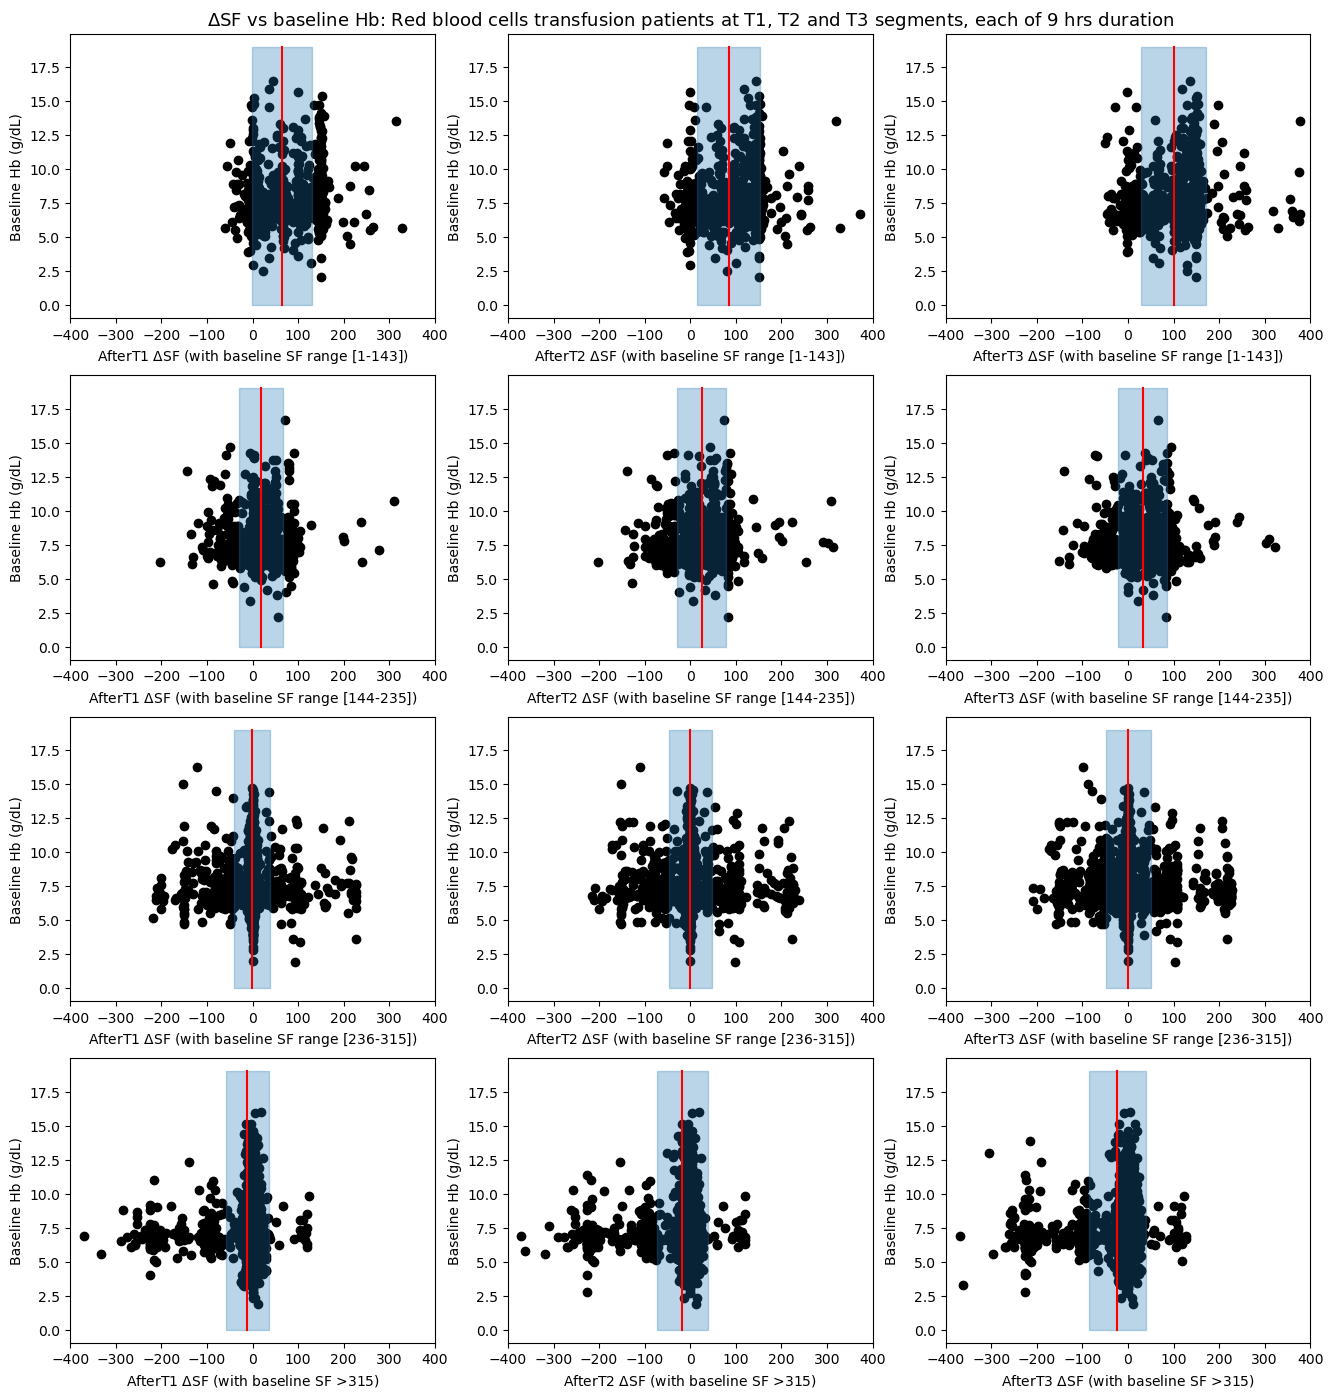

In [40]:
fig, axs = plt.subplots(4, 3, figsize =(16, 17))
line1 = np.arange(20)

axs[0,0].scatter(df_transf['del_SF_1a'], df_transf['Hb'],color='black')
#axs[0,0].set_title('$\Delta$SF vs Hb: Red cells transfusion patients (\u03C4=9hrs)')
axs[0,0].set_xlabel('AfterT1 $\Delta$SF (with baseline SF range [1-143])')
axs[0,0].set_ylabel('Baseline Hb (g/dL)')
axs[0,0].set_xlim([-400, 400])
# axs[0,0].set_ylim([df_transf['Hb'].min()-0.5, df_transf['Hb'].max()+0.5])
axs[0,0].plot(np.nanmean(dSF1a)*np.ones(20), line1,color='red')
axs[0,0].fill_betweenx(line1, m_s_1a[0], m_s_1a[1], color='C0', alpha=0.3)


axs[0,1].scatter(df_transf['del_SF_2a'], df_transf['Hb'],color='black')
axs[0,1].set_title('$\Delta$SF vs baseline Hb: Red blood cells transfusion patients at T1, T2 and T3 segments, each of 9 hrs duration', fontsize = 13)#\u03C4=9hrs
axs[0,1].set_xlabel('AfterT2 $\Delta$SF (with baseline SF range [1-143])')
axs[0,1].set_ylabel('Baseline Hb (g/dL)')
axs[0,1].set_xlim([-400, 400])
# axs[0,1].set_ylim([np.min(mHb2a)-0.5, np.max(mHb2a)+0.5])
axs[0,1].plot(np.nanmean(dSF2a)*np.ones(20), line1,color='red')
#axs[0,1].plot(CI2a[0]*np.ones(20), line1,'g:',CI2a[1]*np.ones(20), line1,'g:')
axs[0,1].fill_betweenx(line1, m_s_2a[0], m_s_2a[1], color='C0', alpha=0.3)


axs[0,2].scatter(df_transf['del_SF_3a'], df_transf['Hb'],color='black')
#axs[0,2].set_title('$\Delta$SF vs Hb: Red cells transfusion patients (\u03C4=9hrs)')
axs[0,2].set_xlabel('AfterT3 $\Delta$SF (with baseline SF range [1-143])')
axs[0,2].set_ylabel('Baseline Hb (g/dL)')
axs[0,2].set_xlim([-400, 400])
# axs[0,2].set_ylim([np.min(mHb3a)-0.5, np.max(mHb3a)+0.5])
axs[0,2].plot(np.nanmean(dSF3a)*np.ones(20), line1,color='red')
#axs[0,2].plot(CI3a[0]*np.ones(20), line1,'g:',CI3a[1]*np.ones(20), line1,'g:')
axs[0,2].fill_betweenx(line1, m_s_3a[0], m_s_3a[1], color='C0', alpha=0.3)


#----------------------------------------------------------------------------
axs[1,0].scatter(df_transf['del_SF_1b'], df_transf['Hb'],color='black')
#axs[1,0].set_title('$\Delta$SF vs Hb: Red cells transfusion patients (\u03C4=9hrs)')
axs[1,0].set_xlabel('AfterT1 $\Delta$SF (with baseline SF range [144-235])')
axs[1,0].set_ylabel('Baseline Hb (g/dL)')
axs[1,0].set_xlim([-400, 400])
# axs[1,0].set_ylim([np.min(mHb1b)-0.5, np.max(mHb1b)+0.5])
axs[1,0].plot(np.nanmean(dSF1b)*np.ones(20), line1,color='red')
axs[1,0].fill_betweenx(line1, m_s_1b[0], m_s_1b[1], color='C0', alpha=0.3)


axs[1,1].scatter(df_transf['del_SF_2b'], df_transf['Hb'],color='black')
#axs[1,1].set_title('$\Delta$SF vs Hb: Red cells transfusion patients (\u03C4=9hrs)')
axs[1,1].set_xlabel('AfterT2 $\Delta$SF (with baseline SF range [144-235])')
axs[1,1].set_ylabel('Baseline Hb (g/dL)')
axs[1,1].set_xlim([-400, 400])
# axs[1,1].set_ylim([np.min(mHb2b)-0.5, np.max(mHb2b)+0.5])
axs[1,1].plot(np.nanmean(dSF2b)*np.ones(20), line1,color='red')
axs[1,1].fill_betweenx(line1, m_s_2b[0], m_s_2b[1], color='C0', alpha=0.3)


axs[1,2].scatter(df_transf['del_SF_3b'], df_transf['Hb'],color='black')
#axs[1,2].set_title('$\Delta$SF vs Hb: Red cells transfusion patients (\u03C4=9hrs)')
axs[1,2].set_xlabel('AfterT3 $\Delta$SF (with baseline SF range [144-235])')
axs[1,2].set_ylabel('Baseline Hb (g/dL)')
axs[1,2].set_xlim([-400, 400])
# axs[1,2].set_ylim([np.min(mHb3b)-0.5, np.max(mHb3b)+0.5])
axs[1,2].plot(np.nanmean(dSF3b)*np.ones(20), line1,color='red')
axs[1,2].fill_betweenx(line1, m_s_3b[0], m_s_3b[1], color='C0', alpha=0.3)

##--------------------------------------------------------------------
axs[2,0].scatter(df_transf['del_SF_1c'], df_transf['Hb'],color='black')
#axs[2,0].set_title('$\Delta$SF vs Hb: Red cells transfusion patients (\u03C4=9hrs)')
axs[2,0].set_xlabel('AfterT1 $\Delta$SF (with baseline SF range [236-315])')
axs[2,0].set_ylabel('Baseline Hb (g/dL)')
axs[2,0].set_xlim([-400, 400])
# axs[2,0].set_ylim([np.min(mHb1c)-0.5, np.max(mHb1c)+0.5])
axs[2,0].plot(np.nanmean(dSF1c)*np.ones(20), line1,color='red')
axs[2,0].fill_betweenx(line1, m_s_1c[0], m_s_1c[1], color='C0', alpha=0.3)


axs[2,1].scatter(df_transf['del_SF_2c'], df_transf['Hb'],color='black')
#axs[2,1].set_title('$\Delta$SF vs Hb: Red cells transfusion patients (\u03C4=9hrs)')
axs[2,1].set_xlabel('AfterT2 $\Delta$SF (with baseline SF range [236-315])')
axs[2,1].set_ylabel('Baseline Hb (g/dL)')
axs[2,1].set_xlim([-400, 400])
# axs[2,1].set_ylim([np.min(mHb2c)-0.5, np.max(mHb2c)+0.5])
axs[2,1].plot(np.nanmean(dSF2c)*np.ones(20), line1,color='red')
axs[2,1].fill_betweenx(line1, m_s_2c[0], m_s_2c[1], color='C0', alpha=0.3)

axs[2,2].scatter(df_transf['del_SF_3c'], df_transf['Hb'],color='black')
#axs[2,2].set_title('$\Delta$SF vs Hb: Red cells transfusion patients (\u03C4=9hrs)')
axs[2,2].set_xlabel('AfterT3 $\Delta$SF (with baseline SF range [236-315])')
axs[2,2].set_ylabel('Baseline Hb (g/dL)')
axs[2,2].set_xlim([-400, 400])
# axs[2,2].set_ylim([np.min(mHb3c)-0.5, np.max(mHb3c)+0.5])
axs[2,2].plot(np.nanmean(dSF3c)*np.ones(20), line1,color='red')
axs[2,2].fill_betweenx(line1, m_s_3c[0], m_s_3c[1], color='C0', alpha=0.3)

##-----------------------------------------------------------------
axs[3,0].scatter(df_transf['del_SF_1d'], df_transf['Hb'],color='black')
#axs[3,0].set_title('$\Delta$SF vs Hb: Red cells transfusion patients (\u03C4=9hrs)')
axs[3,0].set_xlabel('AfterT1 $\Delta$SF (with baseline SF >315)')
axs[3,0].set_ylabel('Baseline Hb (g/dL)')
axs[3,0].set_xlim([-400, 400])
# axs[3,0].set_ylim([np.min(mHb1d)-0.5, np.max(mHb1d)+0.5])
axs[3,0].plot(np.nanmean(dSF1d)*np.ones(20), line1,color='red')
#axs[3,0].plot(CI1d[0]*np.ones(20), line1,'g:',CI1d[1]*np.ones(20), line1,'g:')
axs[3,0].fill_betweenx(line1, m_s_1d[0], m_s_1d[1], color='C0', alpha=0.3)

axs[3,1].scatter(df_transf['del_SF_2d'], df_transf['Hb'],color='black')
#axs[3,1].set_title('$\Delta$SF vs Hb: Red cells transfusion patients (\u03C4=9hrs)')
axs[3,1].set_xlabel('AfterT2 $\Delta$SF (with baseline SF >315)')
axs[3,1].set_ylabel('Baseline Hb (g/dL)')
axs[3,1].set_xlim([-400, 400])
# axs[3,1].set_ylim([np.min(mHb2d)-0.5, np.max(mHb2d)+0.5])
axs[3,1].plot(np.nanmean(dSF2d)*np.ones(20), line1,color='red')
#axs[3,1].plot(CI2d[0]*np.ones(20), line1,'g:',CI2d[1]*np.ones(20), line1,'g:')
axs[3,1].fill_betweenx(line1, m_s_2d[0], m_s_2d[1], color='C0', alpha=0.3)

axs[3,2].scatter(df_transf['del_SF_3d'], df_transf['Hb'],color='black')
#axs[3,2].set_title('$\Delta$SF vs Hb: Red cells transfusion patients (\u03C4=9hrs)')
axs[3,2].set_xlabel('AfterT3 $\Delta$SF (with baseline SF >315)')
axs[3,2].set_ylabel('Baseline Hb (g/dL)')
axs[3,2].set_xlim([-400, 400])
# axs[3,2].set_ylim([np.min(mHb3d)-0.5, np.max(mHb3d)+0.5])
axs[3,2].plot(np.nanmean(dSF3d)*np.ones(20), line1,color='red')
#axs[3,2].plot(CI3d[0]*np.ones(20), line1,'g:',CI3d[1]*np.ones(20), line1,'g:')
axs[3,2].fill_betweenx(line1, m_s_3d[0], m_s_3d[1], color='C0', alpha=0.3)

# plt.savefig('DATA_RESULTS_REV1/delSFvsHb_RedCellsT_withCI_Grady.png',format="png", bbox_inches="tight", dpi=300)

Text(0.5, 0.92, '$\\Delta$SF vs baseline Hb: RBC transfusion patients at post-transfusion T1 segment of 9 hrs duration')

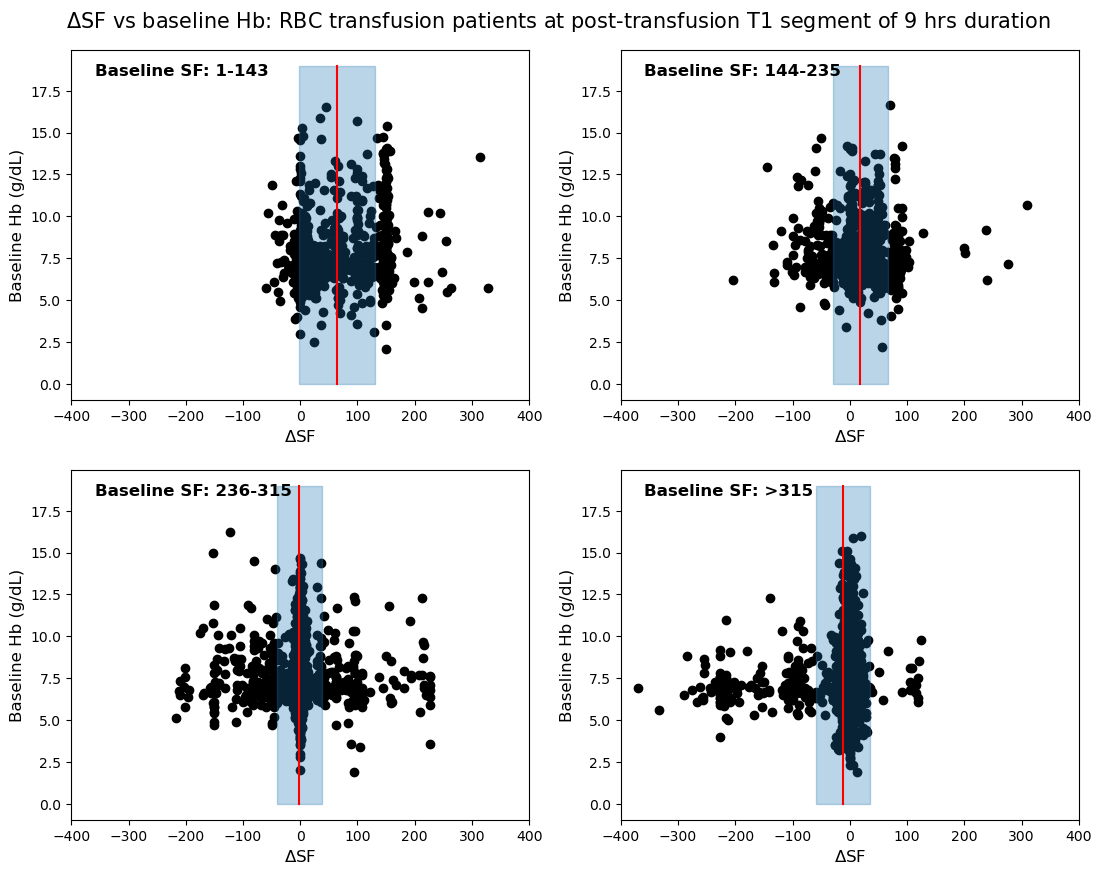

In [41]:
#in 2 x 2 subplots 
fig, axs = plt.subplots(2, 2, figsize =(13, 10))
line1 = np.arange(20)

axs[0,0].scatter(df_transf['del_SF_1a'], df_transf['Hb'],color='black')
#axs[0,0].set_title('$\Delta$SF vs Hb: Red cells transfusion patients (\u03C4=9hrs)')
axs[0,0].set_xlabel('$\Delta$SF', fontsize=12)
axs[0,0].set_ylabel('Baseline Hb (g/dL)', fontsize=12)
axs[0,0].set_xlim([-400, 400])
# axs[0,0].set_ylim([np.min(mHb1a)-0.5, np.max(mHb1a)+0.5])
axs[0,0].plot(np.nanmean(dSF1a)*np.ones(20), line1,color='red')
axs[0,0].fill_betweenx(line1, m_s_1a[0], m_s_1a[1], color='C0', alpha=0.3)


#----------------------------------------------------------------------------
axs[0,1].scatter(df_transf['del_SF_1b'], df_transf['Hb'],color='black')
axs[0,1].set_xlabel('$\Delta$SF', fontsize=12)
axs[0,1].set_ylabel('Baseline Hb (g/dL)', fontsize=12)
axs[0,1].set_xlim([-400, 400])
# axs[0,1].set_ylim([np.min(mHb1b)-0.5, np.max(mHb1b)+0.5])
axs[0,1].plot(np.nanmean(dSF1b)*np.ones(20), line1,color='red')
axs[0,1].fill_betweenx(line1, m_s_1b[0], m_s_1b[1], color='C0', alpha=0.3)

##--------------------------------------------------------------------
axs[1,0].scatter(df_transf['del_SF_1c'], df_transf['Hb'],color='black')
#axs[1,0].set_title('$\Delta$SF vs Hb: Red cells transfusion patients (\u03C4=9hrs)')
axs[1,0].set_xlabel('$\Delta$SF', fontsize=12)
axs[1,0].set_ylabel('Baseline Hb (g/dL)', fontsize=12)
axs[1,0].set_xlim([-400, 400])
# axs[1,0].set_ylim([np.min(mHb1c)-0.5, np.max(mHb1c)+0.5])
axs[1,0].plot(np.nanmean(dSF1c)*np.ones(20), line1,color='red')
axs[1,0].fill_betweenx(line1, m_s_1c[0], m_s_1c[1], color='C0', alpha=0.3)

##-----------------------------------------------------------------
axs[1,1].scatter(df_transf['del_SF_1d'], df_transf['Hb'],color='black')
#axs[1,1].set_title('$\Delta$SF vs Hb: Red cells transfusion patients (\u03C4=9hrs)')
axs[1,1].set_xlabel('$\Delta$SF', fontsize=12)
axs[1,1].set_ylabel('Baseline Hb (g/dL)', fontsize=12)
axs[1,1].set_xlim([-400, 400])
# axs[1,1].set_ylim([np.min(mHb1d)-0.5, np.max(mHb1d)+0.5])
axs[1,1].plot(np.nanmean(dSF1d)*np.ones(20), line1,color='red')
#axs[1,1].plot(CI1d[0]*np.ones(20), line1,'g:',CI1d[1]*np.ones(20), line1,'g:')
axs[1,1].fill_betweenx(line1, m_s_1d[0], m_s_1d[1], color='C0', alpha=0.3)


# Show texts
axs[0,0].text(0.051, 0.96, 'Baseline SF: 1-143', horizontalalignment='left', verticalalignment='top', transform=axs[0,0].transAxes, fontsize=12, fontdict=dict(weight='bold'))
axs[0,1].text(0.051, 0.96, 'Baseline SF: 144-235', horizontalalignment='left', verticalalignment='top', transform=axs[0,1].transAxes, fontsize=12, fontdict=dict(weight='bold'))
axs[1,0].text(0.051, 0.96, 'Baseline SF: 236-315', horizontalalignment='left', verticalalignment='top', transform=axs[1,0].transAxes, fontsize=12, fontdict=dict(weight='bold'))
axs[1,1].text(0.051, 0.96, 'Baseline SF: >315', horizontalalignment='left', verticalalignment='top', transform=axs[1,1].transAxes, fontsize=12, fontdict=dict(weight='bold'))


#ax2.text(0.9, 0.5, 'End text', horizontalalignment='center', verticalalignment='center', transform=ax2.transAxes)


plt.suptitle('$\Delta$SF vs baseline Hb: RBC transfusion patients at post-transfusion T1 segment of 9 hrs duration', fontsize = 15, y=0.92)#\u03C4=9hrs
#plt.show()

# plt.savefig('DATA_RESULTS_REV1/delSFvsHb_RedCellsT_withCI_2by2_Grady.png',format="png", bbox_inches="tight", dpi=300)

**$\Delta$ SF vs baseline SF**

In [42]:
np.max(MSFbaseline_gp1)+0.5

143.35714285714286

In [43]:
df_transf.columns

Index(['pat_id', 'csn', 'age_yrs', 'transfusion_start', 'transfusion_end',
       'blood_product_name', 'hospital_admission_date_time',
       'hospital_discharge_date_time', 'unit', 'year', 'Arb', 'Tcount_7d',
       'discharge_to', 'age', 'gender', 'race', 'ethnicity', 'Hb',
       'med_spo2_beforeT', 'med_Hb_beforeT', 'med_SF_beforeT',
       'med_PF_beforeT', 'MSPO2_afterT1', 'MSPO2_afterT2', 'MSPO2_afterT3',
       'MHB_afterT1', 'MHB_afterT2', 'MHB_afterT3', 'MSF_afterT1',
       'MSF_afterT2', 'MSF_afterT3', 'MPF_afterT1', 'MPF_afterT2',
       'MPF_afterT3', 'del_SPO2_1', 'del_SPO2_2', 'del_SPO2_3', 'del_Hb_1',
       'del_Hb_2', 'del_Hb_3', 'del_SF_1', 'del_SF_2', 'del_SF_3', 'del_PF_1',
       'del_PF_2', 'del_PF_3', 'MSF_beforeT', 'del_SF_1a', 'del_SF_2a',
       'del_SF_3a', 'del_SF_1b', 'del_SF_2b', 'del_SF_3b', 'del_SF_1c',
       'del_SF_2c', 'del_SF_3c', 'del_SF_1d', 'del_SF_2d', 'del_SF_3d'],
      dtype='object')

In [44]:
# MSFbaseline_gp1.isnull().sum()
df_transf['del_SF_2a'].isnull().sum()

5686

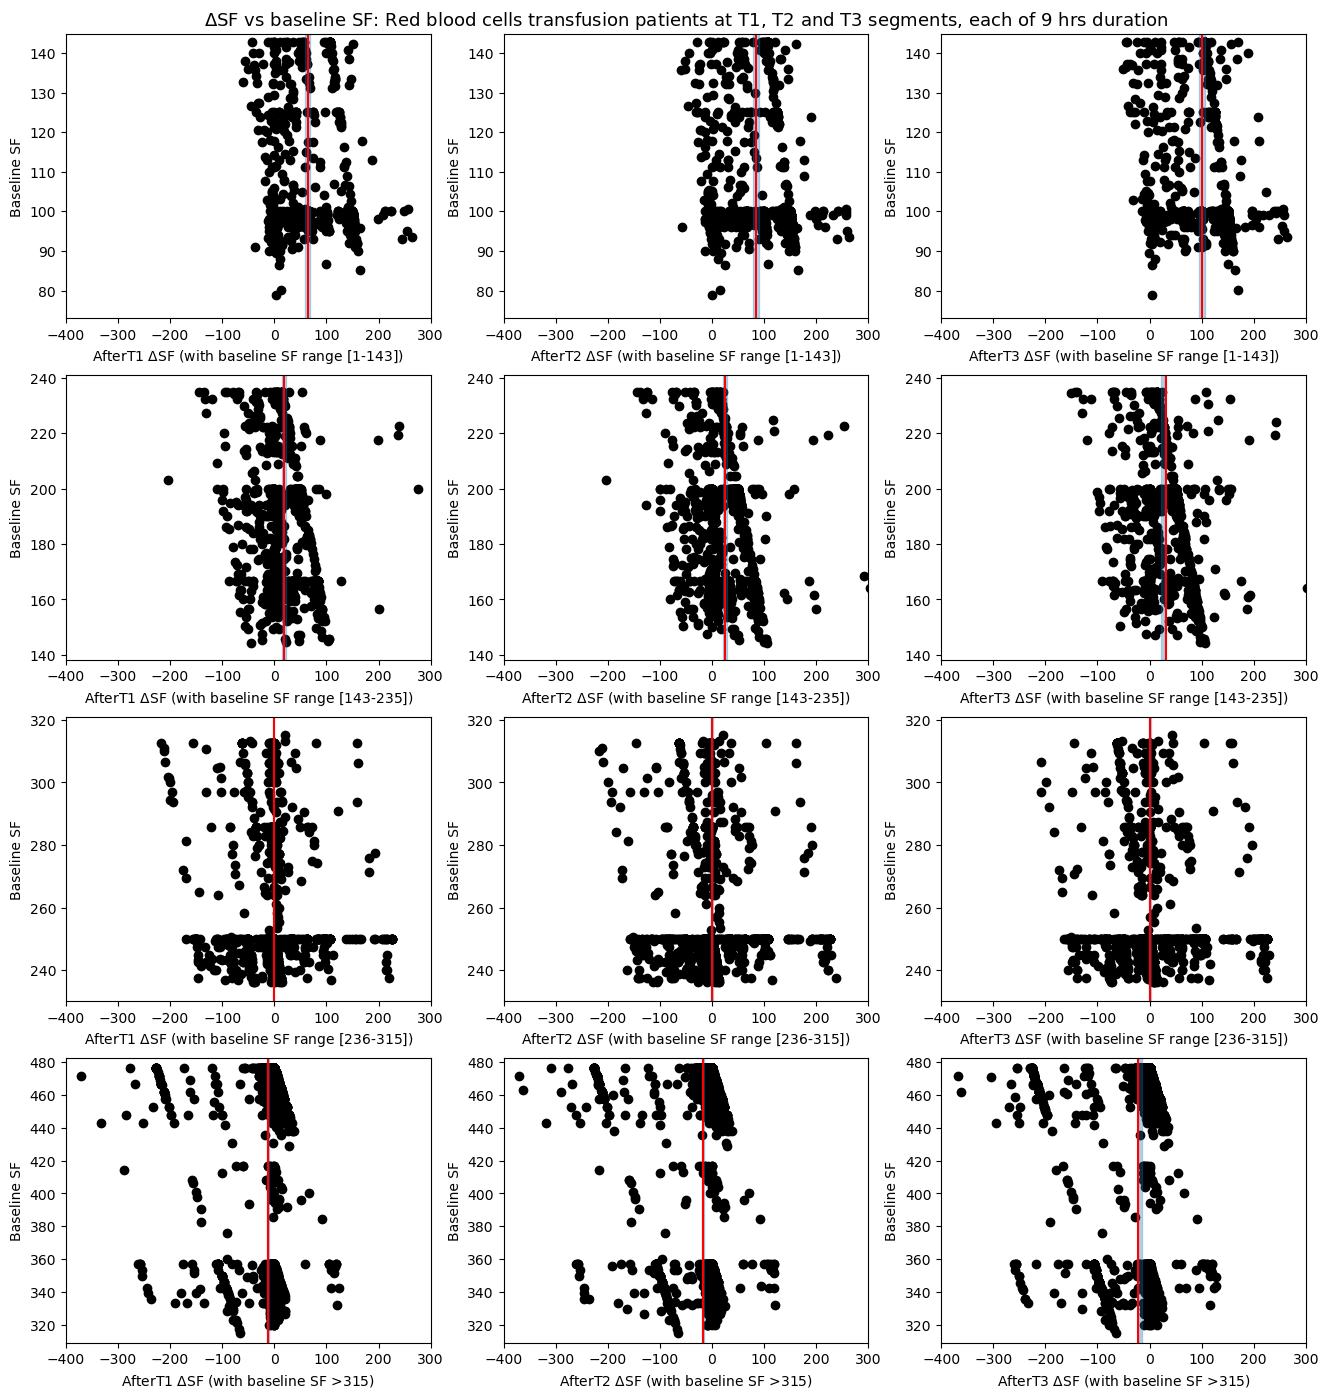

In [45]:
fig, axs = plt.subplots(4, 3, figsize =(16, 17))
line1 = np.arange(500)

axs[0,0].scatter(df_transf['del_SF_1a'], MSFbaseline_gp1,color='black')
#axs[0,0].set_title('$\Delta$SF vs Hb: Red cells transfusion patients (\u03C4=9hrs)')
axs[0,0].set_xlabel('AfterT1 $\Delta$SF (with baseline SF range [1-143])')
axs[0,0].set_ylabel('Baseline SF')
axs[0,0].set_xlim([-400, 300])
axs[0,0].set_ylim([np.min(MSFbaseline_gp1)-6, np.max(MSFbaseline_gp1)+2])
axs[0,0].plot(np.mean(dSF1a)*np.ones(500), line1,color='red')
axs[0,0].fill_betweenx(line1, CI1a[0], CI1a[1], color='C0', alpha=0.3)


axs[0,1].scatter(df_transf['del_SF_2a'], MSFbaseline_gp1,color='black')
axs[0,1].set_title('$\Delta$SF vs baseline SF: Red blood cells transfusion patients at T1, T2 and T3 segments, each of 9 hrs duration', fontsize = 13)#\u03C4=9hrs
axs[0,1].set_xlabel('AfterT2 $\Delta$SF (with baseline SF range [1-143])')
axs[0,1].set_ylabel('Baseline SF')
axs[0,1].set_xlim([-400, 300])
axs[0,1].set_ylim([np.min(MSFbaseline_gp1)-6, np.max(MSFbaseline_gp1)+2])
axs[0,1].plot(np.mean(dSF2a)*np.ones(500), line1,color='red')
#axs[0,1].plot(CI2a[0]*np.ones(20), line1,'g:',CI2a[1]*np.ones(20), line1,'g:')
axs[0,1].fill_betweenx(line1, CI2a[0], CI2a[1], color='C0', alpha=0.3)


axs[0,2].scatter(df_transf['del_SF_3a'], MSFbaseline_gp1,color='black')
#axs[0,2].set_title('$\Delta$SF vs Hb: Red cells transfusion patients (\u03C4=9hrs)')
axs[0,2].set_xlabel('AfterT3 $\Delta$SF (with baseline SF range [1-143])')
axs[0,2].set_ylabel('Baseline SF')
axs[0,2].set_xlim([-400, 300])
axs[0,2].set_ylim([np.min(MSFbaseline_gp1)-6, np.max(MSFbaseline_gp1)+2])
axs[0,2].plot(np.mean(dSF3a)*np.ones(500), line1,color='red')
#axs[0,2].plot(CI3a[0]*np.ones(20), line1,'g:',CI3a[1]*np.ones(20), line1,'g:')
axs[0,2].fill_betweenx(line1, CI3a[0], CI3a[1], color='C0', alpha=0.3)


#----------------------------------------------------------------------------
axs[1,0].scatter(df_transf['del_SF_1b'], MSFbaseline_gp2,color='black')
#axs[1,0].set_title('$\Delta$SF vs Hb: Red cells transfusion patients (\u03C4=9hrs)')
axs[1,0].set_xlabel('AfterT1 $\Delta$SF (with baseline SF range [143-235])')
axs[1,0].set_ylabel('Baseline SF')
axs[1,0].set_xlim([-400, 300])
axs[1,0].set_ylim([np.min(MSFbaseline_gp2)-6, np.max(MSFbaseline_gp2)+6])
axs[1,0].plot(np.mean(dSF1b)*np.ones(500), line1,color='red')
axs[1,0].fill_betweenx(line1, CI1b[0], CI1b[1], color='C0', alpha=0.3)


axs[1,1].scatter(df_transf['del_SF_2b'], MSFbaseline_gp2,color='black')
#axs[1,1].set_title('$\Delta$SF vs Hb: Red cells transfusion patients (\u03C4=9hrs)')
axs[1,1].set_xlabel('AfterT2 $\Delta$SF (with baseline SF range [143-235])')
axs[1,1].set_ylabel('Baseline SF')
axs[1,1].set_xlim([-400, 300])
axs[1,1].set_ylim([np.min(MSFbaseline_gp2)-6, np.max(MSFbaseline_gp2)+6])
axs[1,1].plot(np.mean(dSF2b)*np.ones(500), line1,color='red')
axs[1,1].fill_betweenx(line1, CI2b[0], CI2b[1], color='C0', alpha=0.3)


axs[1,2].scatter(df_transf['del_SF_3b'], MSFbaseline_gp2,color='black')
#axs[1,2].set_title('$\Delta$SF vs Hb: Red cells transfusion patients (\u03C4=9hrs)')
axs[1,2].set_xlabel('AfterT3 $\Delta$SF (with baseline SF range [143-235])')
axs[1,2].set_ylabel('Baseline SF')
axs[1,2].set_xlim([-400, 300])
axs[1,2].set_ylim([np.min(MSFbaseline_gp2)-6, np.max(MSFbaseline_gp2)+6])
axs[1,2].plot(np.mean(dSF3b)*np.ones(500), line1,color='red')
axs[1,2].fill_betweenx(line1, CI3b[0], CI3b[1], color='C0', alpha=0.3)

##--------------------------------------------------------------------
axs[2,0].scatter(df_transf['del_SF_1c'], MSFbaseline_gp3,color='black')
#axs[2,0].set_title('$\Delta$SF vs Hb: Red cells transfusion patients (\u03C4=9hrs)')
axs[2,0].set_xlabel('AfterT1 $\Delta$SF (with baseline SF range [236-315])')
axs[2,0].set_ylabel('Baseline SF')
axs[2,0].set_xlim([-400, 300])
axs[2,0].set_ylim([np.min(MSFbaseline_gp3)-6, np.max(MSFbaseline_gp3)+6])
axs[2,0].plot(np.mean(dSF1c)*np.ones(500), line1,color='red')
axs[2,0].fill_betweenx(line1, CI1c[0], CI1c[1], color='C0', alpha=0.3)


axs[2,1].scatter(df_transf['del_SF_2c'], MSFbaseline_gp3,color='black')
#axs[2,1].set_title('$\Delta$SF vs Hb: Red cells transfusion patients (\u03C4=9hrs)')
axs[2,1].set_xlabel('AfterT2 $\Delta$SF (with baseline SF range [236-315])')
axs[2,1].set_ylabel('Baseline SF')
axs[2,1].set_xlim([-400, 300])
axs[2,1].set_ylim([np.min(MSFbaseline_gp3)-6, np.max(MSFbaseline_gp3)+6])
axs[2,1].plot(np.mean(dSF2c)*np.ones(500), line1,color='red')
axs[2,1].fill_betweenx(line1, CI2c[0], CI2c[1], color='C0', alpha=0.3)

axs[2,2].scatter(df_transf['del_SF_3c'], MSFbaseline_gp3,color='black')
#axs[2,2].set_title('$\Delta$SF vs Hb: Red cells transfusion patients (\u03C4=9hrs)')
axs[2,2].set_xlabel('AfterT3 $\Delta$SF (with baseline SF range [236-315])')
axs[2,2].set_ylabel('Baseline SF')
axs[2,2].set_xlim([-400, 300])
axs[2,2].set_ylim([np.min(MSFbaseline_gp3)-6, np.max(MSFbaseline_gp3)+6])
axs[2,2].plot(np.mean(dSF3c)*np.ones(500), line1,color='red')
axs[2,2].fill_betweenx(line1, CI3c[0], CI3c[1], color='C0', alpha=0.3)

##-----------------------------------------------------------------
axs[3,0].scatter(df_transf['del_SF_1d'], MSFbaseline_gp4,color='black')
#axs[3,0].set_title('$\Delta$SF vs Hb: Red cells transfusion patients (\u03C4=9hrs)')
axs[3,0].set_xlabel('AfterT1 $\Delta$SF (with baseline SF >315)')
axs[3,0].set_ylabel('Baseline SF')
axs[3,0].set_xlim([-400, 300])
axs[3,0].set_ylim([np.min(MSFbaseline_gp4)-6, np.max(MSFbaseline_gp4)+6])
axs[3,0].plot(np.mean(dSF1d)*np.ones(500), line1,color='red')
#axs[3,0].plot(CI1d[0]*np.ones(20), line1,'g:',CI1d[1]*np.ones(20), line1,'g:')
axs[3,0].fill_betweenx(line1, CI1d[0], CI1d[1], color='C0', alpha=0.3)

axs[3,1].scatter(df_transf['del_SF_2d'], MSFbaseline_gp4,color='black')
#axs[3,1].set_title('$\Delta$SF vs Hb: Red cells transfusion patients (\u03C4=9hrs)')
axs[3,1].set_xlabel('AfterT2 $\Delta$SF (with baseline SF >315)')
axs[3,1].set_ylabel('Baseline SF')
axs[3,1].set_xlim([-400, 300])
axs[3,1].set_ylim([np.min(MSFbaseline_gp4)-6, np.max(MSFbaseline_gp4)+6])
axs[3,1].plot(np.mean(dSF2d)*np.ones(500), line1,color='red')
#axs[3,1].plot(CI2d[0]*np.ones(20), line1,'g:',CI2d[1]*np.ones(20), line1,'g:')
axs[3,1].fill_betweenx(line1, CI2d[0], CI2d[1], color='C0', alpha=0.3)

axs[3,2].scatter(df_transf['del_SF_3d'], MSFbaseline_gp4,color='black')
#axs[3,2].set_title('$\Delta$SF vs Hb: Red cells transfusion patients (\u03C4=9hrs)')
axs[3,2].set_xlabel('AfterT3 $\Delta$SF (with baseline SF >315)')
axs[3,2].set_ylabel('Baseline SF')
axs[3,2].set_xlim([-400, 300])
axs[3,2].set_ylim([np.min(MSFbaseline_gp4)-6, np.max(MSFbaseline_gp4)+6])
axs[3,2].plot(np.mean(dSF3d)*np.ones(500), line1,color='red')
#axs[3,2].plot(CI3d[0]*np.ones(20), line1,'g:',CI3d[1]*np.ones(20), line1,'g:')
axs[3,2].fill_betweenx(line1, CI3d[0], CI3d[1], color='C0', alpha=0.3)

# plt.savefig('DATA_RESULTS_REV1/delSFvsBSF_RedCellsT_withCI_Grady.png',format="png", bbox_inches="tight", dpi=300)


In [46]:
np.shape(dSF1b), np.shape(MSFbaseline_gp2)

((816,), (6375,))

## Relation establishment: Baseline SF and RBC.T. efficacy (Delta SF)

In [47]:
from scipy.optimize import curve_fit

In [48]:
def func(x, a, b, c, d):
    return (a*(x)**3) + (b*(x)**2) + (c*(x)) + d

In [50]:
# xdata = [100, 200, 300, 400]
#xdata = np.append(np.append(np.append(100*np.ones(len(dSF1a)), 200*np.ones(len(dSF1b))), 300*np.ones(len(dSF1c))), 400*np.ones(len(dSF1d))) #Quantized baseline SF 


# BSFa = MSFbaseline_gp1.values #MSFbaseline_gp1[~np.isnan(MSFbaseline_gp1)]
# BSFb = MSFbaseline_gp2.values  #MSFbaseline_gp2[~np.isnan(MSFbaseline_gp2)]
# BSFc = MSFbaseline_gp3.values  #MSFbaseline_gp3[~np.isnan(MSFbaseline_gp3)]
# BSFd = MSFbaseline_gp4.values  #MSFbaseline_gp4[~np.isnan(MSFbaseline_gp4)]
# xdata = np.append(np.append(np.append(BSFa, BSFb), BSFc), BSFd) #consider original/actual baseline SF

In [49]:
xdata = pd.concat([MSFbaseline_gp1,MSFbaseline_gp2,MSFbaseline_gp3,MSFbaseline_gp4])

In [50]:
ydata = pd.concat([df_transf['del_SF_1a'],df_transf['del_SF_1b'],df_transf['del_SF_1c'],df_transf['del_SF_1d']])

In [53]:
# # ydata = [np.mean(dSF1a), np.mean(dSF1b), np.mean(dSF1c), np.mean(dSF1d)]
# # ydata = [np.array(dSF1a), np.array(dSF1b), np.array(dSF1c), np.array(dSF1d)]
# # ydata = np.append([dSF1a1, dSF1b1, dSF1c1], dSF1d1)
# # dSF1a1 = np.transpose(list(dSF1a))
# # dSF1b1 = np.transpose(list(dSF1b))
# # dSF1c1 = np.transpose(list(dSF1c))
# # dSF1d1 = np.transpose(list(dSF1d))

# dSF1a1 = df_transf['del_SF_1a'].values
# dSF1b1 = df_transf['del_SF_1b'].values
# dSF1c1 = df_transf['del_SF_1c'].values
# dSF1d1 = df_transf['del_SF_1d'].values
# ydata = np.append(np.append(np.append(dSF1a1, dSF1b1), dSF1c1), dSF1d1)


In [51]:
xy=pd.concat([xdata, ydata], axis=1)
xy

,0,1
0,None,None
1,None,None
2,None,None
3,None,None
4,None,None
...,...,...
6370,447.619048,-101.190476
6371,466.122449,-216.122449
6372,469.642857,-0.595238
6373,442.857143,14.285714


In [52]:
xy2 = xy[~xy.isnull().any(axis=1)]
xy2

,0,1
20,98.0,60.333333
32,137.142857,62.857143
40,94.0,146.0
57,125.0,97.222222
58,100.0,150.0
...,...,...
6369,471.428571,4.761905
6370,447.619048,-101.190476
6371,466.122449,-216.122449
6372,469.642857,-0.595238


In [53]:
np.sum(xy2[0]>10) #Just to avoid outliers

6371

In [54]:
xy2 = xy2[xy2[0]>10] #Just to avoid outliers

In [55]:
xy2.sort_values(by=[0], inplace=True)

In [56]:
xy2

,0,1
2208,79.0,3.0
5379,80.15,13.1
2505,85.25,164.75
5776,86.5,8.5
3052,86.666667,99.333333
...,...,...
4185,476.190476,0.0
4194,476.190476,-9.52381
4209,476.190476,-4.761905
3966,476.190476,0.0


In [57]:
xy2[0].min(), xy2[0].max()

(79.0, 476.1904761904762)

In [58]:
xdata_new = (xy2.iloc[:,0])
ydata_new = (xy2.iloc[:,1])

In [59]:
popt, pcov = curve_fit(func, xdata_new, ydata_new)

In [60]:
popt

array([-7.97637567e-07,  1.79032797e-03, -1.01045783e+00,  1.51992503e+02])

In [61]:
pcov

array([[ 3.54281702e-13, -2.99010996e-10,  7.35412425e-08,
        -5.15031967e-06],
       [-2.99010996e-10,  2.54215186e-07, -6.32184549e-05,
         4.49890224e-03],
       [ 7.35412425e-08, -6.32184549e-05,  1.60039409e-02,
        -1.17051678e+00],
       [-5.15031967e-06,  4.49890224e-03, -1.17051678e+00,
         8.97178742e+01]])

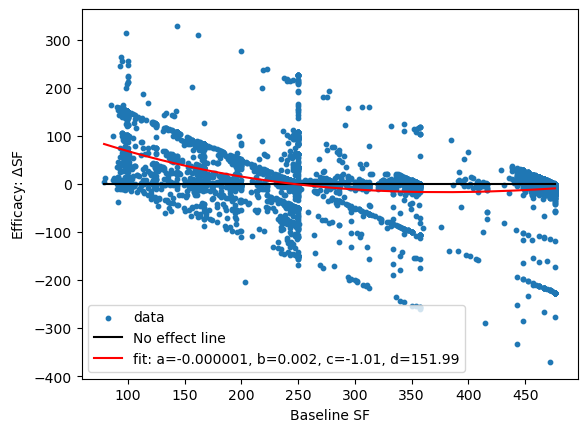

In [62]:
plt.scatter(xdata_new, ydata_new, label='data', s=10)
ll = np.arange(xdata_new.min(), xdata_new.max())
plt.plot(ll, np.zeros(len(ll)), color='k', label='No effect line')
plt.plot(xdata_new, func(xdata_new, *popt), 'r-',label='fit: a=%5.6f, b=%5.3f, c=%5.2f, d=%5.2f' % tuple(popt))
plt.xlabel('Baseline SF')
plt.ylabel('Efficacy: $\Delta$SF')


plt.legend()
# plt.xlim([0,500])
# plt.ylim([-500,500])
plt.show()

Text(0, 0.5, 'Efficacy: $\\Delta$SF')

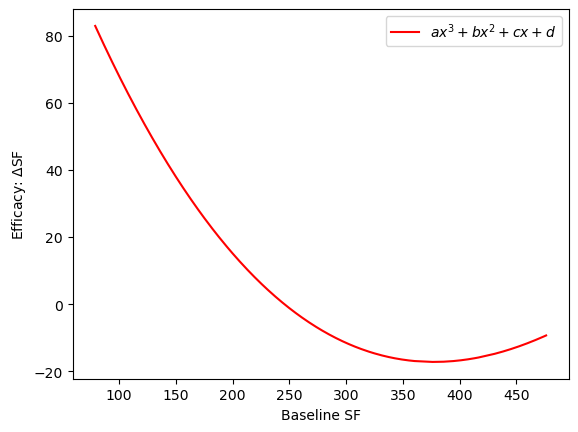

In [63]:
plt.plot(xdata_new, func(xdata_new, *popt), 'r-',label='$ax^3 + bx^2 + cx + d$' )
plt.legend()
plt.xlabel('Baseline SF')
plt.ylabel('Efficacy: $\Delta$SF')

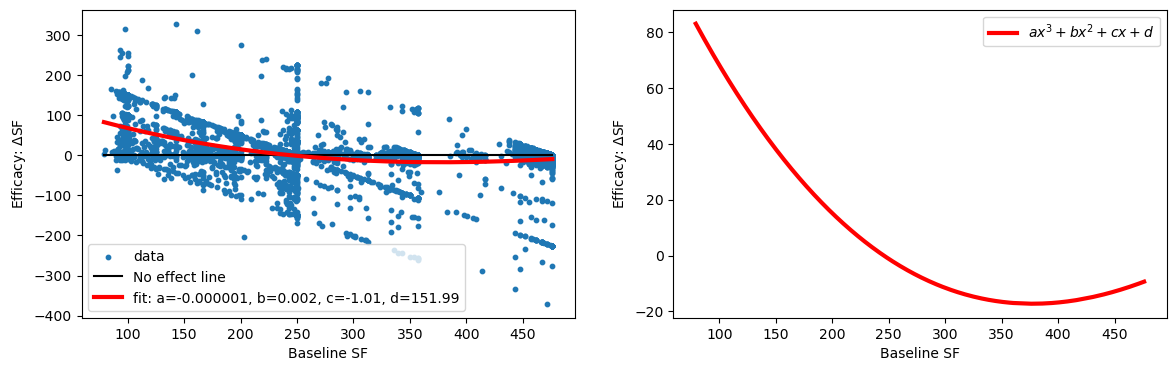

In [64]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,4))
ax1.scatter(xdata_new, ydata_new, label='data', s=10)
ll = np.arange(xdata_new.min(), xdata_new.max())
ax1.plot(ll, np.zeros(len(ll)), color='k', label='No effect line')
ax1.plot(xdata_new, func(xdata_new, *popt), 'r-',label='fit: a=%5.6f, b=%5.3f, c=%5.2f, d=%5.2f' % tuple(popt), lw=3)
ax1.set_xlabel('Baseline SF')
ax1.set_ylabel('Efficacy: $\Delta$SF')
ax1.legend()

ax2.plot(xdata_new, func(xdata_new, *popt), 'r-',label='$ax^3 + bx^2 + cx + d$' , lw=3)
ax2.legend()
ax2.set_xlabel('Baseline SF')
ax2.set_ylabel('Efficacy: $\Delta$SF')

# plt.xlim([0,500])
# plt.ylim([-500,500])
plt.show()

In [65]:
import sklearn
print('R2 square : ',sklearn.metrics.r2_score(ydata_new, func(xdata_new, *popt)))

R2 square :  0.20323495534305513


In [66]:
xdata_new = np.asarray(xdata_new,  dtype=float)
ydata_new = np.asarray(ydata_new,  dtype=float)

# Storing Grady baseline SF and del SF pairs

In [90]:
xy = np.transpose(np.vstack((xdata_new, ydata_new)))

In [ ]:
# np.save('DATA_RESULTS_REV1/grady_baselineSF_delSF.npy', xy)




# Polynoial curve fitting

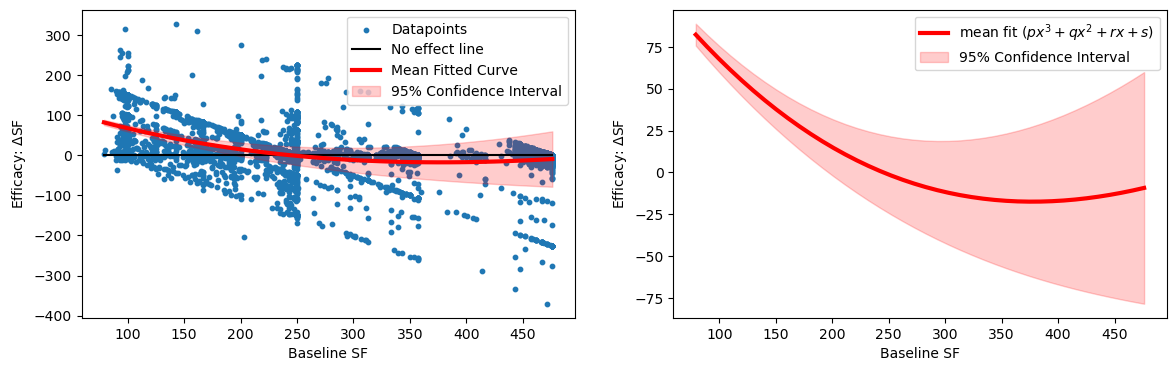

Mean coefficients of the fitted polynomial: [-7.15876905e-07  1.71795788e-03 -9.90407109e-01  1.50136555e+02]
95% confidence intervals of the fitted polynomial coefficients: (array([-8.79197669e-07,  1.57801076e-03, -1.02613382e+00,  1.47373359e+02]), array([-5.52556140e-07,  1.85790499e-03, -9.54680394e-01,  1.52899751e+02]))
R2 square :  0.20322268357731899


In [93]:
def bootstrap_polyfit(x, y, n_bootstrap=50):
    # Number of bootstrap samples: n_bootstrap 
    # Store the polynomial coefficients for each bootstrap sample
    bootstrap_coefficients = []

    # Perform bootstrap sampling
    for _ in range(n_bootstrap):
        # Randomly select 80% of the samples with replacement
        indices = np.random.choice(len(x), size=int(0.9 * len(x)), replace=True)
        x_sample = x[indices]
        y_sample = y[indices]
        
        # Perform polynomial curve fitting with degree 3 (quadratic)
        coefficients = np.polyfit(x_sample, y_sample, 3)
        bootstrap_coefficients.append(coefficients)

    # Convert to numpy array for easier manipulation
    bootstrap_coefficients = np.array(bootstrap_coefficients)

    # Calculate the mean and 95% confidence intervals for the polynomial coefficients
    mean_coefficients = np.mean(bootstrap_coefficients, axis=0)
    # conf_intervals = np.percentile(bootstrap_coefficients, [2.5, 97.5], axis=0)

    #stderr_coefficients = np.std(bootstrap_coefficients, axis=0, ddof=1) / np.sqrt(n_bootstrap)
    conf_intervals = st.t.interval(0.95, n_bootstrap-1, loc=mean_coefficients, scale=st.sem(bootstrap_coefficients, nan_policy='omit')) #stderr_coefficients)

    # Generate polynomial function from mean coefficients
    mean_polynomial = np.poly1d(mean_coefficients)

    # Generate x values for plotting the fitted curve
    x_fit = np.linspace(min(x), max(x), 40)
    y_fit_mean = mean_polynomial(x_fit)

    # Calculate the confidence intervals for the fitted curve
    y_fit_lower = np.poly1d(conf_intervals[0])(x_fit)
    y_fit_upper = np.poly1d(conf_intervals[1])(x_fit)

    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,4))
    ax1.scatter(x, y, label='Datapoints', s=10)
    ll = np.arange(x.min(), x.max())
    ax1.plot(ll, np.zeros(len(ll)), color='k', label='No effect line')
    ax1.plot(x_fit, y_fit_mean, label='Mean Fitted Curve', color='red', lw=3)
    ax1.fill_between(x_fit, y_fit_lower, y_fit_upper, color='red', alpha=0.2, label='95% Confidence Interval')
    ax1.set_xlabel('Baseline SF')
    ax1.set_ylabel('Efficacy: $\Delta$SF')
    ax1.legend()

    ax2.plot(x_fit, y_fit_mean, 'r-',label='mean fit ($px^3 + qx^2 + rx + s$)' , lw=3)
    ax2.fill_between(x_fit, y_fit_lower, y_fit_upper, color='red', alpha=0.2, label='95% Confidence Interval')
    ax2.legend()
    ax2.set_xlabel('Baseline SF')
    ax2.set_ylabel('Efficacy: $\Delta$SF')

    # plt.xlim([0,500])
    # plt.ylim([-500,500])
    plt.show()

    # Print the mean coefficients and confidence intervals of the fitted polynomial
    print("Mean coefficients of the fitted polynomial:", mean_coefficients)
    print("95% confidence intervals of the fitted polynomial coefficients:", conf_intervals)
    return mean_coefficients



# xxxxx = np.linspace(1, 100, 100)
# yyyyy = xxxxx**2 + np.random.normal(scale=150, size=100) # Example: y = x^2
# bootstrap_polyfit(xxxxx, yyyyy, n_bootstrap=100)
mean_coefficients = bootstrap_polyfit(xdata_new, ydata_new, n_bootstrap=100)
print('R2 square : ',sklearn.metrics.r2_score(ydata_new, np.poly1d(mean_coefficients)(xdata_new)))

In [74]:
import sklearn


# Random Forest Regressor

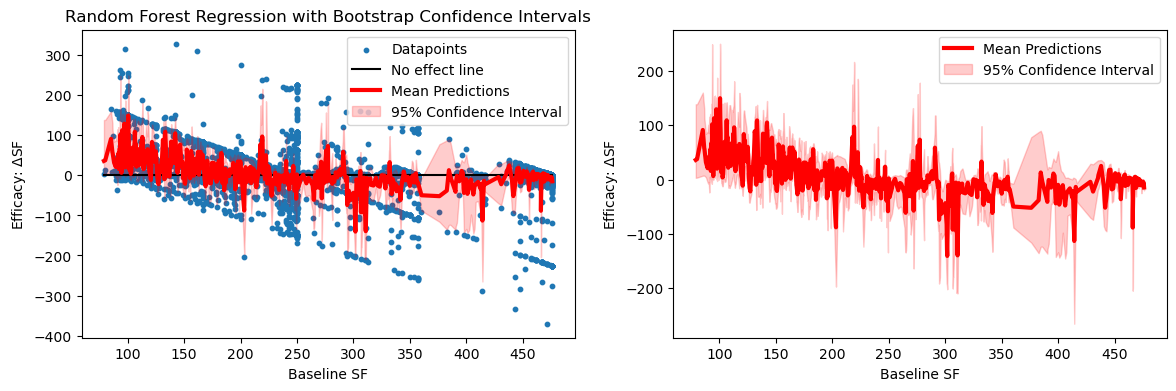

Mean predictions of the fitted curve: [ 35.96408922  37.44676922  91.0114296  ... -14.63827051 -14.63827051
 -14.63827051]
95% confidence intervals of the fitted curve: [[  3.052725     3.476275     7.02324167 ... -20.06421387 -20.06421387
  -20.06421387]
 [138.27296111 138.27296111 159.671475   ... -10.22564329 -10.22564329
  -10.22564329]]
R2 square :  0.31025362108645327


In [75]:
from sklearn.ensemble import RandomForestRegressor

def bootstrap_RFR(x, y, n_bootstrap=50):
    # Reshape x for the regressor
    x = x.reshape(-1, 1)

    # Store the predictions for each bootstrap sample
    bootstrap_predictions = []

    # Perform bootstrap sampling
    for _ in range(n_bootstrap):
        # Randomly select 80% of the samples with replacement
        indices = np.random.choice(len(x), size=int(0.8 * len(x)), replace=True)
        x_sample = x[indices]
        y_sample = y[indices]
        
        # Create and train the random forest regressor
        rf = RandomForestRegressor(n_estimators=100)
        rf.fit(x_sample, y_sample)
        
        # Predict on the full x range
        y_pred = rf.predict(x)
        bootstrap_predictions.append(y_pred)

    # Convert to numpy array for easier manipulation
    bootstrap_predictions = np.array(bootstrap_predictions)

    # Calculate the mean and 95% confidence intervals for the predictions
    mean_predictions = np.mean(bootstrap_predictions, axis=0)
    conf_intervals = np.percentile(bootstrap_predictions, [2.5, 97.5], axis=0)

    # # Plot the original data points and the mean fitted curve with confidence intervals
    # plt.scatter(x, y, label='Data Points')
    # plt.plot(x, mean_predictions, label='Mean Fitted Curve', color='red')
    # plt.fill_between(x.flatten(), conf_intervals[0], conf_intervals[1], color='red', alpha=0.2, label='95% Confidence Interval')
    # plt.xlabel('x')
    # plt.ylabel('y')
    # plt.legend()
    # plt.title('Random Forest Regression with Bootstrap Confidence Intervals')
    # plt.show()


    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,4))
    ax1.scatter(x, y, label='Datapoints', s=10)
    ll = np.arange(x.min(), x.max())
    ax1.plot(ll, np.zeros(len(ll)), color='k', label='No effect line')
    ax1.plot(x, mean_predictions, label='Mean Predictions', color='red', lw=3)
    ax1.fill_between(x.flatten(), conf_intervals[0], conf_intervals[1], color='red', alpha=0.2, label='95% Confidence Interval')
    ax1.set_xlabel('Baseline SF')
    ax1.set_ylabel('Efficacy: $\Delta$SF')
    ax1.legend()
    ax1.set_title('Random Forest Regression with Bootstrap Confidence Intervals')

    ax2.plot(x, mean_predictions, 'r-',label='Mean Predictions', lw=3)
    ax2.fill_between(x.flatten(), conf_intervals[0], conf_intervals[1], color='red', alpha=0.2, label='95% Confidence Interval')
    ax2.legend()
    ax2.set_xlabel('Baseline SF')
    ax2.set_ylabel('Efficacy: $\Delta$SF')
    plt.show()

    # Print the mean predictions and confidence intervals of the fitted curve
    print("Mean predictions of the fitted curve:", mean_predictions)
    print("95% confidence intervals of the fitted curve:", conf_intervals)
    return mean_predictions


# xxxxx = np.linspace(1, 100, 100)
# yyyyy = xxxxx**2 + np.random.normal(scale=150, size=100) # Example: y = x^2
# bootstrap_polyfit(xxxxx, yyyyy, n_bootstrap=100)
mean_predictions = bootstrap_RFR(xdata_new, ydata_new, n_bootstrap=100)
print('R2 square : ',sklearn.metrics.r2_score(ydata_new, mean_predictions))

/Users/tilendrachoudhary/anaconda3/lib/python3.11/site-packages/statsmodels/nonparametric/smoothers_lowess.py:227: RuntimeWarning: invalid value encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),


R2 square :  0.1787456999456848


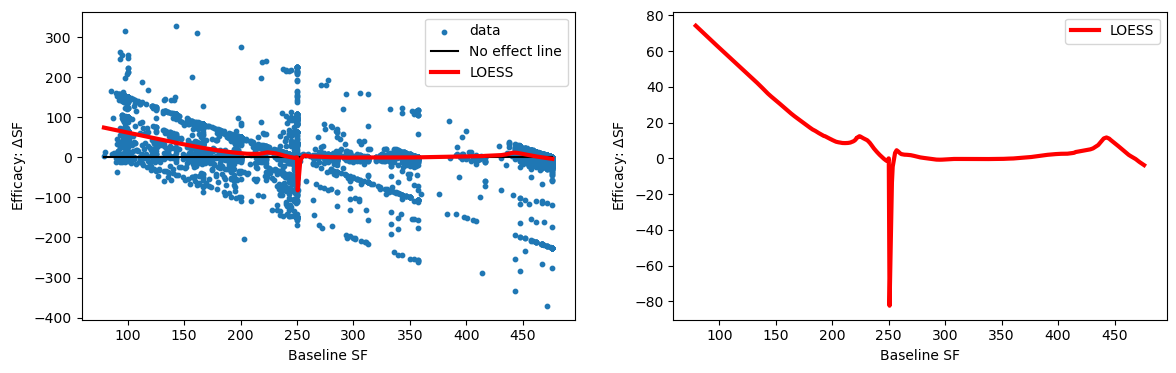

In [76]:
from statsmodels.nonparametric.smoothers_lowess import lowess

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,4))
ax1.scatter(xdata_new, ydata_new, label='data', s=10)
ll = np.arange(xdata_new.min(), xdata_new.max())
ax1.plot(ll, np.zeros(len(ll)), color='k', label='No effect line')


filtered = lowess(ydata_new, xdata_new, frac=0.17) #frac=0.15
ax1.plot(filtered[:, 0], filtered[:, 1], 'r-',label='LOESS', lw=3)
ax1.set_xlabel('Baseline SF')
ax1.set_ylabel('Efficacy: $\Delta$SF')
ax1.legend()



ax2.plot(filtered[:, 0], filtered[:, 1], 'r-',label='LOESS', lw=3)
ax2.legend()
ax2.set_xlabel('Baseline SF')
ax2.set_ylabel('Efficacy: $\Delta$SF')

print('R2 square : ', sklearn.metrics.r2_score(ydata_new, filtered[:, 1]))
# # plt.xlim([0,500])
# # plt.ylim([-500,500])
plt.show()

In [77]:
z = np.polyfit(list(xdata_new), list(ydata_new), 3)
p = np.poly1d(z)
z

array([-7.97638852e-07,  1.79032906e-03, -1.01045810e+00,  1.51992522e+02])

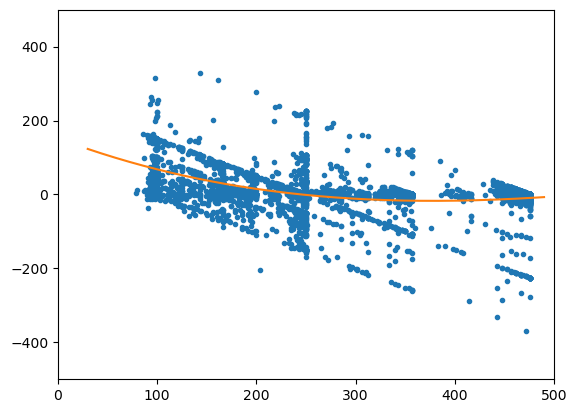

In [81]:
xp = np.linspace(30, 490, 200)
plt.plot(xdata_new, ydata_new, '.', xp, p(xp), '-')
plt.xlim([0,500])
plt.ylim([-500,500])
plt.show()

In [82]:
#define function to calculate adjusted r-squared
def adjR(x, y, degree):
    results = {}
    coeffs = np.polyfit(x, y, degree)
    p = np.poly1d(coeffs)
    yhat = p(x)
    ybar = np.sum(y)/len(y)
    ssreg = np.sum((yhat-ybar)**2)
    sstot = np.sum((y - ybar)**2)
    results['r_squared'] = 1- (((1-(ssreg/sstot))*(len(y)-1))/(len(y)-degree-1))
    return results

In [83]:
adjR(list(xdata_new), list(ydata_new), 1)

{'r_squared': 0.11855675915670039}

**Modification/Postprocessing of ydata (i.e. $\Delta$SF)** 

For same baseline SFs, find mean of $\Delta$SFs. xdata: baseline SF, ydata: $\Delta$SF

In [84]:
xdata

0             None
1             None
2             None
3             None
4             None
           ...    
6370    447.619048
6371    466.122449
6372    469.642857
6373    442.857143
6374          None
Length: 25500, dtype: object

In [85]:
x=[1, 5, 3, 9, 5, 3, 2, 5]
y=[100, 120, 140, 100, 400, 200, 250, 300]

In [86]:
data = {'x1':xdata_new, 'y1':ydata_new}

In [87]:
df1=pd.DataFrame(data)
df1

,x1,y1
2208,79.0,3.0
5379,80.15,13.1
2505,85.25,164.75
5776,86.5,8.5
3052,86.666667,99.333333
...,...,...
4185,476.190476,0.0
4194,476.190476,-9.52381
4209,476.190476,-4.761905
3966,476.190476,0.0


In [88]:
df2=df1.sort_values(by=['x1']).reset_index(drop=True)

In [75]:
df2

,x1,y1
0,79.0,3.0
1,80.15,13.1
2,85.25,164.75
3,86.5,8.5
4,86.666667,99.333333
...,...,...
6370,476.190476,-9.52381
6371,476.190476,-19.047619
6372,476.190476,0.0
6373,476.190476,0.0


In [89]:
xdata_n = np.unique(df2['x1'])
xdata_n

array([79.0, 80.15, 85.25, 86.5, 86.66666666666667, 88.0, 89.5, 90.0,
       90.5, 91.0, 91.47222222222224, 91.625, 91.75, 92.0,
       92.28333333333332, 92.375, 92.5, 93.0, 93.25, 93.5, 94.0, 94.5,
       94.75, 95.0, 95.16666666666666, 95.25, 95.375, 95.625, 95.75,
       95.91836734693878, 95.9398148148148, 96.0, 96.16666666666666,
       96.375, 96.5, 96.58333333333334, 96.625, 96.66666666666669, 96.75,
       96.96969696969695, 97.0, 97.125, 97.1943887775551, 97.25, 97.375,
       97.5, 97.66666666666669, 97.75, 97.88888888888889,
       97.89473684210526, 97.89473684210527, 97.95918367346938, 98.0,
       98.16666666666666, 98.42857142857144, 98.44155844155844,
       98.48484848484848, 98.5, 98.625, 98.75, 98.83333333333334,
       98.989898989899, 99.0, 99.08333333333334, 99.1, 99.125,
       99.16666666666666, 99.21739130434784, 99.25, 99.33333333333331,
       99.375, 99.41666666666666, 99.48979591836736, 99.5,
       99.55555555555556, 99.66666666666669, 99.75, 99.8, 99.822

In [90]:
ydata_n = []
for i in xdata_n:
    ids=np.where(df2['x1']==i)
    # print(ids[0])
    mn = np.mean(df2['y1'].iloc[ids[0]])
    ydata_n = np.append(ydata_n, mn)

## TE=a(1/BSF)+b

In [91]:
z = np.polyfit(list(1/xdata_n), ydata_n, 3)
p = np.poly1d(z)
z

array([-3.92071216e+08,  7.49902630e+06, -3.23822951e+04,  2.57882086e+01])

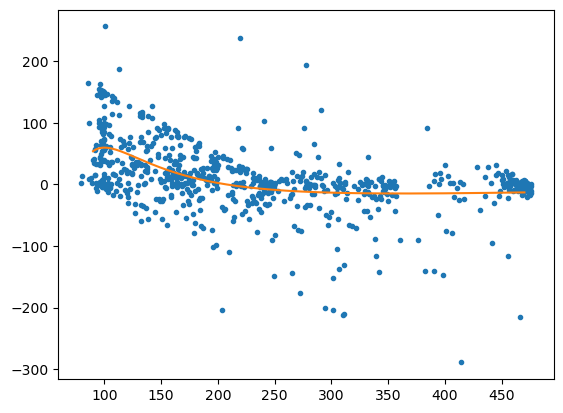

In [92]:
xp = np.linspace(90, 470, 5000)
plt.plot(xdata_n, ydata_n, '.', xp, p(1/xp), '-')

plt.show()

In [93]:
adjR(list(1/xdata_n), ydata_n, 3)

{'r_squared': 0.24130913487379568}

## Delta PF vs baseline Hb

In [81]:

# df_transf['del_PF_1']=df_transf['MPF_afterT1'] - df_transf['MPF_beforeT']
# df_transf['del_PF_2']=df_transf['MPF_afterT2'] - df_transf['MPF_beforeT']
# df_transf['del_PF_3']=df_transf['MPF_afterT3'] - df_transf['MPF_beforeT']

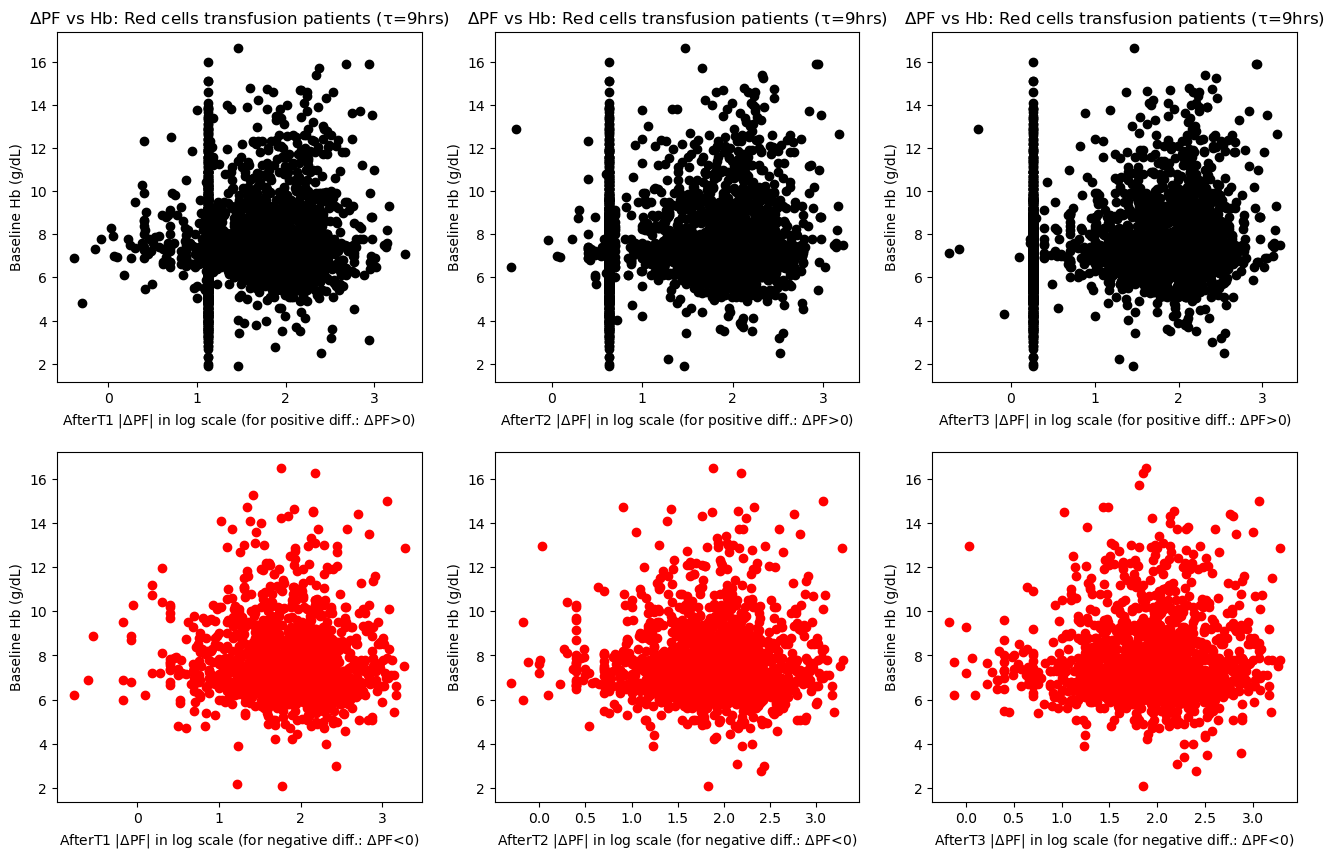

In [ ]:
fig, axs = plt.subplots(2, 3, figsize =(16, 10))

delPF1=df_transf['del_PF_1'][df_transf['del_PF_1']>0]
Hb1 = df_transf['Hb'][df_transf['del_PF_1']>0]
axs[0,0].scatter(np.log10(delPF1), Hb1, color='black')
axs[0,0].set_title('$\Delta$PF vs Hb: Red cells transfusion patients (\u03C4=9hrs)')
axs[0,0].set_xlabel('AfterT1 |$\Delta$PF| in log scale (for positive diff.: $\Delta$PF>0)')
axs[0,0].set_ylabel('Baseline Hb (g/dL)')
#axs[0].set_xscale('symlog')#loglog(basex=10)

delPF2=df_transf['del_PF_2'][df_transf['del_PF_2']>0]
Hb2 = df_transf['Hb'][df_transf['del_PF_2']>0]
axs[0,1].scatter(np.log10(delPF2), Hb2,color='black')
axs[0,1].set_title('$\Delta$PF vs Hb: Red cells transfusion patients (\u03C4=9hrs)')
axs[0,1].set_xlabel('AfterT2 |$\Delta$PF| in log scale (for positive diff.: $\Delta$PF>0)')
axs[0,1].set_ylabel('Baseline Hb (g/dL)')
#axs[1].set_xscale('symlog')#loglog(basex=10)

delPF3=df_transf['del_PF_3'][df_transf['del_PF_3']>0]
Hb3 = df_transf['Hb'][df_transf['del_PF_3']>0]
axs[0,2].scatter(np.log10(delPF3), Hb3,color='black')
axs[0,2].set_title('$\Delta$PF vs Hb: Red cells transfusion patients (\u03C4=9hrs)')
axs[0,2].set_xlabel('AfterT3 |$\Delta$PF| in log scale (for positive diff.: $\Delta$PF>0)')
axs[0,2].set_ylabel('Baseline Hb (g/dL)')
#axs[2].set_xscale('symlog')#loglog(basex=10)

#-------------------
delPF1n=np.abs(df_transf['del_PF_1'][df_transf['del_PF_1']<0])
Hb1n = df_transf['Hb'][df_transf['del_PF_1']<0]
axs[1,0].scatter(np.log10(delPF1n), Hb1n, color='red')
#axs[1,0].set_title('$\Delta$PF vs Hb: Red cells transfusion patients (\u03C4=9hrs)')
axs[1,0].set_xlabel('AfterT1 |$\Delta$PF| in log scale (for negative diff.: $\Delta$PF<0)')
axs[1,0].set_ylabel('Baseline Hb (g/dL)')
#axs[0].set_xscale('symlog')#loglog(basex=10)

delPF2n=np.abs(df_transf['del_PF_2'][df_transf['del_PF_2']<0])
Hb2n = df_transf['Hb'][df_transf['del_PF_2']<0]
axs[1,1].scatter(np.log10(delPF2n), Hb2n,color='red')
#axs[1,1].set_title('$\Delta$PF vs Hb: Red cells transfusion patients (\u03C4=9hrs)')
axs[1,1].set_xlabel('AfterT2 |$\Delta$PF| in log scale (for negative diff.: $\Delta$PF<0)')
axs[1,1].set_ylabel('Baseline Hb (g/dL)')
#axs[1].set_xscale('symlog')#loglog(basex=10)

delPF3n=np.abs(df_transf['del_PF_3'][df_transf['del_PF_3']<0])
Hb3n = df_transf['Hb'][df_transf['del_PF_3']<0]
axs[1,2].scatter(np.log10(delPF3n), Hb3n,color='red')
#axs[1,2].set_title('$\Delta$PF vs Hb: Red cells transfusion patients (\u03C4=9hrs)')
axs[1,2].set_xlabel('AfterT3 |$\Delta$PF| in log scale (for negative diff.: $\Delta$PF<0)')
axs[1,2].set_ylabel('Baseline Hb (g/dL)')
#axs[2].set_xscale('symlog')#loglog(basex=10)

# plt.savefig('DATA_RESULTS_REV1/delPFvsHb_RedCellsT_6_23_22_delPF_log_Grady.png')

## Find Demographics

In [96]:
df_transf.columns

Index(['pat_id', 'csn', 'age_yrs', 'transfusion_start', 'transfusion_end',
       'blood_product_name', 'hospital_admission_date_time',
       'hospital_discharge_date_time', 'unit', 'year', 'Arb', 'Tcount_7d',
       'discharge_to', 'age', 'gender', 'race', 'ethnicity', 'Hb',
       'med_spo2_beforeT', 'med_Hb_beforeT', 'med_SF_beforeT',
       'med_PF_beforeT', 'MSPO2_afterT1', 'MSPO2_afterT2', 'MSPO2_afterT3',
       'MHB_afterT1', 'MHB_afterT2', 'MHB_afterT3', 'MSF_afterT1',
       'MSF_afterT2', 'MSF_afterT3', 'MPF_afterT1', 'MPF_afterT2',
       'MPF_afterT3', 'del_SPO2_1', 'del_SPO2_2', 'del_SPO2_3', 'del_Hb_1',
       'del_Hb_2', 'del_Hb_3', 'del_SF_1', 'del_SF_2', 'del_SF_3', 'del_PF_1',
       'del_PF_2', 'del_PF_3', 'MSF_beforeT', 'del_SF_1a', 'del_SF_2a',
       'del_SF_3a', 'del_SF_1b', 'del_SF_2b', 'del_SF_3b', 'del_SF_1c',
       'del_SF_2c', 'del_SF_3c', 'del_SF_1d', 'del_SF_2d', 'del_SF_3d'],
      dtype='object')

In [97]:
Total_T_instances = len(df_transf)
Total_T_instances

6375

In [98]:
Total_pat_csn = len(np.unique(df_transf['csn']))
Total_pat_csn

3757

In [99]:
csns = df_transf['csn']

In [100]:
df_transf.columns

Index(['pat_id', 'csn', 'age_yrs', 'transfusion_start', 'transfusion_end',
       'blood_product_name', 'hospital_admission_date_time',
       'hospital_discharge_date_time', 'unit', 'year', 'Arb', 'Tcount_7d',
       'discharge_to', 'age', 'gender', 'race', 'ethnicity', 'Hb',
       'med_spo2_beforeT', 'med_Hb_beforeT', 'med_SF_beforeT',
       'med_PF_beforeT', 'MSPO2_afterT1', 'MSPO2_afterT2', 'MSPO2_afterT3',
       'MHB_afterT1', 'MHB_afterT2', 'MHB_afterT3', 'MSF_afterT1',
       'MSF_afterT2', 'MSF_afterT3', 'MPF_afterT1', 'MPF_afterT2',
       'MPF_afterT3', 'del_SPO2_1', 'del_SPO2_2', 'del_SPO2_3', 'del_Hb_1',
       'del_Hb_2', 'del_Hb_3', 'del_SF_1', 'del_SF_2', 'del_SF_3', 'del_PF_1',
       'del_PF_2', 'del_PF_3', 'MSF_beforeT', 'del_SF_1a', 'del_SF_2a',
       'del_SF_3a', 'del_SF_1b', 'del_SF_2b', 'del_SF_3b', 'del_SF_1c',
       'del_SF_2c', 'del_SF_3c', 'del_SF_1d', 'del_SF_2d', 'del_SF_3d'],
      dtype='object')

In [101]:
len(csns.unique())

3757

In [102]:
### TABLEONE

In [103]:
df_transf.shape

(6375, 59)

## Table One of Demographic and Important Features

In [111]:
medianAllSuperTable3new = pd.read_csv("../tc_Transfusion_Phenotyping/dfGrady_rbcT_ReducedFeatures_OurlierRejected_NoImputed_v1g.csv")

In [112]:
medianAllSuperTable3new.shape, len(medianAllSuperTable3new.csn.unique()), df_transf.shape, len(df_transf.csn.unique())

((6382, 94), 3706, (6375, 61), 3757)

In [91]:
df_transf.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'pat_id', 'csn', 'age_yrs',
       'transfusion_start', 'transfusion_end', 'blood_product_name',
       'hospital_admission_date_time', 'hospital_discharge_date_time', 'unit',
       'year', 'Arb', 'Tcount_7d', 'discharge_to', 'age', 'gender', 'race',
       'ethnicity', 'Hb', 'med_spo2_beforeT', 'med_Hb_beforeT',
       'med_SF_beforeT', 'med_PF_beforeT', 'MSPO2_afterT1', 'MSPO2_afterT2',
       'MSPO2_afterT3', 'MHB_afterT1', 'MHB_afterT2', 'MHB_afterT3',
       'MSF_afterT1', 'MSF_afterT2', 'MSF_afterT3', 'MPF_afterT1',
       'MPF_afterT2', 'MPF_afterT3', 'del_SPO2_1', 'del_SPO2_2', 'del_SPO2_3',
       'del_Hb_1', 'del_Hb_2', 'del_Hb_3', 'del_SF_1', 'del_SF_2', 'del_SF_3',
       'del_PF_1', 'del_PF_2', 'del_PF_3', 'MSF_beforeT', 'del_SF_1a',
       'del_SF_2a', 'del_SF_3a', 'del_SF_1b', 'del_SF_2b', 'del_SF_3b',
       'del_SF_1c', 'del_SF_2c', 'del_SF_3c', 'del_SF_1d', 'del_SF_2d',
       'del_SF_3d'],
      dtype='object')

## Relation for del SpO2 and del SF

In [100]:
# del_SF_12 = np.append(df_transf['del_SF_1'], df_transf['del_SF_2'])
# del_SF_all = np.append(del_SF_12, df_transf['del_SF_3'])
# del_SF_all

In [105]:
del_SF_all = pd.concat([df_transf['del_SF_1'], df_transf['del_SF_2'], df_transf['del_SF_3']],axis=0)
del_SF_all.reset_index(drop=True, inplace=True)
del_SF_all.fillna(del_SF_all.median(), inplace=True)
del_SF_all

0       -107.142857
1         -4.375000
2          2.777778
3          0.000000
4         -2.500000
            ...    
19120   -129.761905
19121   -223.622449
19122    -29.166667
19123     28.571429
19124     33.333333
Length: 19125, dtype: float64

In [102]:
# del_spo2_12 = np.append(df_transf['del_SPO2_1'], df_transf['del_SPO2_2'])
# del_spo2_all = np.append(del_spo2_12, df_transf['del_SPO2_3'])
# del_spo2_all

In [106]:
del_spo2_all = pd.concat([df_transf['del_SPO2_1'], df_transf['del_SPO2_2'], df_transf['del_SPO2_3']],axis=0)
del_spo2_all.reset_index(drop=True, inplace=True)
del_spo2_all.fillna(del_spo2_all.median(), inplace=True)
del_spo2_all

0        0.000000
1       -1.750000
2       -5.750000
3        0.000000
4       -1.000000
           ...   
19120   -5.000000
19121   -1.421429
19122   -6.125000
19123    6.000000
19124    0.000000
Length: 19125, dtype: float64

In [107]:
#Normalization (Z-score)
del_SF_allN = (del_SF_all - np.mean(del_SF_all))/np.std(del_SF_all)
del_spo2_allN = (del_spo2_all - np.mean(del_spo2_all))/np.std(del_spo2_all)

# del_SF_allN = (del_SF_all - np.min(del_SF_all))/(np.max(del_SF_all) - np.min(del_SF_all))
# del_spo2_allN = (del_spo2_all - np.min(del_spo2_all))/(np.max(del_spo2_all) - np.min(del_spo2_all))

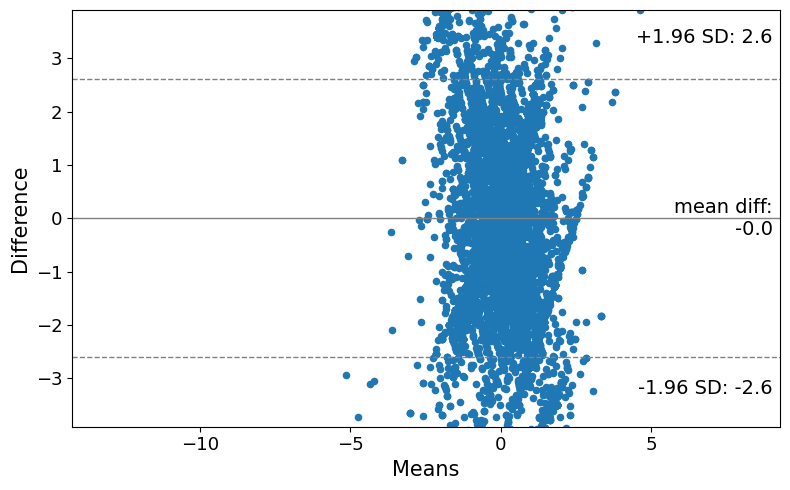

In [108]:
import statsmodels.api as sm
f, ax = plt.subplots(1, figsize = (8,5))
sm.graphics.mean_diff_plot(del_spo2_allN, del_SF_allN, ax = ax)

plt.show()

In [106]:
# pip install pyCompare

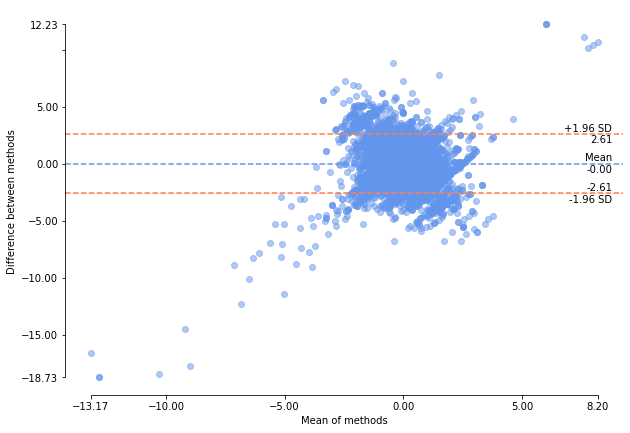

In [109]:
import pyCompare
# pyCompare.blandAltman(del_SF_allN, del_spo2_allN)
pyCompare.blandAltman(del_spo2_allN, del_SF_allN)

r and p-value are: 0.11617188263784169 1.866228258009121e-58


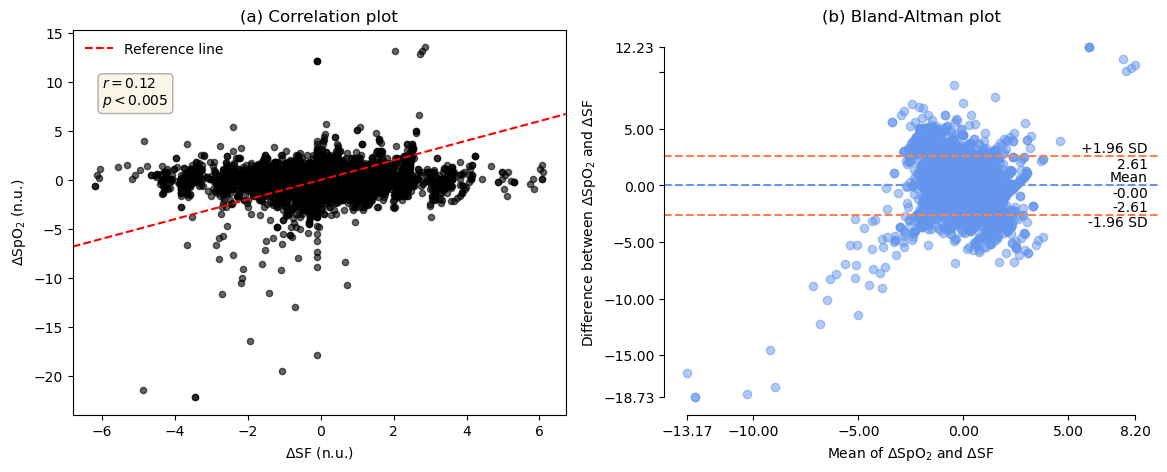

In [ ]:
import scipy.stats

fig, axs = plt.subplots(1, 2, figsize =(14, 5))

axs[0].scatter(
     del_SF_allN, del_spo2_allN,
    c='k', s=20, alpha=0.6, marker='o'
)
# Get axis limits
left, right = axs[0].set_xlim()
# Reference line
axs[0].plot([left, right], [left, right], c='r', ls='--', label='Reference line')

r, p = scipy.stats.pearsonr(del_spo2_allN, del_SF_allN)
print(f'r and p-value are:', r, p)

axs[0].legend(frameon=False)
axs[0].set_xlabel('$\Delta$SF (n.u.)')
axs[0].set_ylabel('$\Delta$SpO$_2$ (n.u.)')

textstr = '\n'.join((r'$r=%.2f$' % (r),  r'$p<%.3f$' % (0.005 )))
props = dict(boxstyle='round', facecolor='wheat', alpha=0.3)
# place a text box in upper left in axes coords


axs[0].text(0.06, 0.88, textstr, transform=axs[0].transAxes, fontsize=10,
        verticalalignment='top', horizontalalignment='left', bbox=props)
axs[0].set_title('(a) Correlation plot')

pyCompare.blandAltman(del_spo2_allN, del_SF_allN, ax = axs[1])
axs[1].set_xlabel('Mean of $\Delta$SpO$_2$ and $\Delta$SF')
axs[1].set_ylabel('Difference between $\Delta$SpO$_2$ and $\Delta$SF')
axs[1].set_title('(b) Bland-Altman plot')
# axs[1].set_ylim([-10,10])

# plt.savefig('DATA_RESULTS_REV1/BlandAltmanGrady_delspo2_and_delSF.png', dpi=300)